# 1) Avacado  Average Price Prediction Project

In [123]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [124]:
#loading the dataset
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [125]:
df.shape

(18249, 14)

This dataset contains 18249 rows and 14 columns.

In [126]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [127]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


We will rewmove the unnamed column since it contains random nos.

In [128]:
df.drop(['Unnamed: 0'], axis =1, inplace=True)

In [129]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [130]:
#To see columns in a list
df.columns.to_list()

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [131]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Checking Null Values

In [133]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

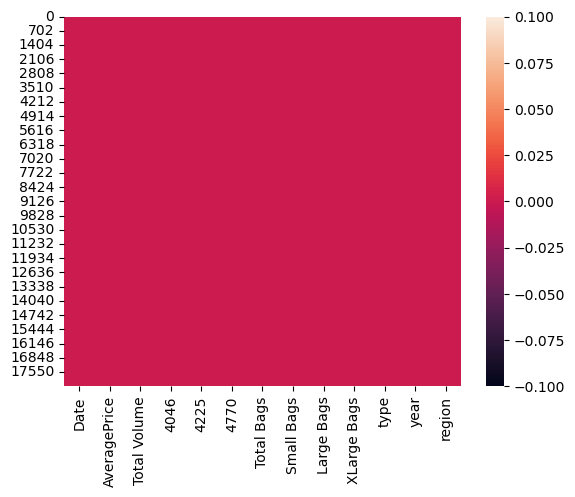

In [134]:
#To see null values in a heatmap.
sns.heatmap(df.isnull())

Here, we can see that no null/missing values found.

In [135]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# Renaming Columns

In [136]:
df.columns = ['Date', 'Average_Price', 'Total_Volume', 'PLU_4046_Sold', 'PLU_4225_Sold', 'PLU_4770_Sold',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year',
       'Region']

In [137]:
df.head(5)

,Date,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [138]:
df.sample(15)

,Date,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
1807,2015-03-29,1.25,69747.20,2566.52,51530.22,1503.84,14146.62,14034.79,108.32,3.51,conventional,2015,Pittsburgh
15217,2017-01-01,1.34,36915.87,36.67,34076.57,0.00,2802.63,2802.63,0.00,0.00,organic,2017,Chicago
2711,2015-11-08,0.88,5094837.54,2204338.57,1668416.99,107753.58,1114328.40,770544.02,341544.79,2239.59,conventional,2015,West
11477,2015-10-11,1.51,59217.48,26165.72,5052.77,0.00,27998.99,26778.29,1220.70,0.00,organic,2015,SouthCentral
4807,2016-07-17,1.06,264253.28,82855.27,92471.42,9386.11,79540.48,69396.45,683.20,9460.83,conventional,2016,RichmondNorfolk
10229,2015-10-11,2.22,4355.33,1288.15,2770.52,0.00,296.66,296.66,0.00,0.00,organic,2015,LasVegas
4863,2016-06-19,1.00,158224.62,38806.24,58287.79,134.48,60996.11,57154.04,32.07,3810.00,conventional,2016,Roanoke
4017,2016-09-25,1.37,75513.07,1967.21,41728.53,413.43,31403.90,13833.11,17570.79,0.00,conventional,2016,Louisville
12660,2016-01-03,1.57,8032.68,1673.67,5173.13,0.00,1185.88,196.67,989.21,0.00,organic,2016,Detroit
9551,2015-10-25,1.61,22648.93,1033.01,21495.92,0.00,120.00,120.00,0.00,0.00,organic,2015,Chicago


# Checking Unique values

In [139]:
df.nunique()

Date               169
Average_Price      259
Total_Volume     18237
PLU_4046_Sold    17702
PLU_4225_Sold    18103
PLU_4770_Sold    12071
Total_Bags       18097
Small_Bags       17321
Large_Bags       15082
XLarge_Bags       5588
Type                 2
Year                 4
Region              54
dtype: int64

In [140]:
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Date,169
Average_Price,259
Total_Volume,18237
PLU_4046_Sold,17702
PLU_4225_Sold,18103
PLU_4770_Sold,12071
Total_Bags,18097
Small_Bags,17321
Large_Bags,15082
XLarge_Bags,5588


In [141]:
df["Date"].value_counts() 

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

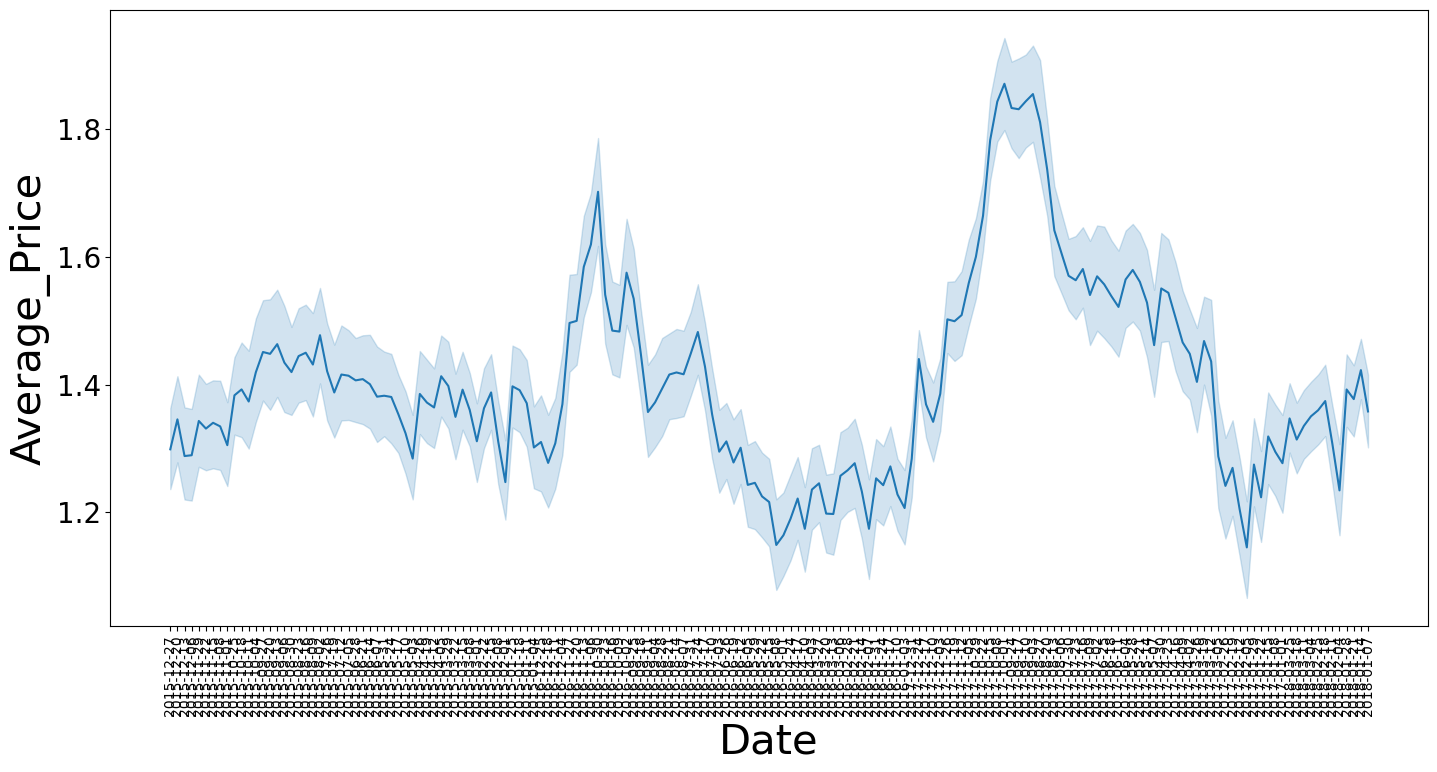

In [142]:
plt.figure(figsize = (17,8))
sns.lineplot(x='Date', y='Average_Price', data =df)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Average_Price', fontsize=30)
plt.yticks(size=20)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Average Price')

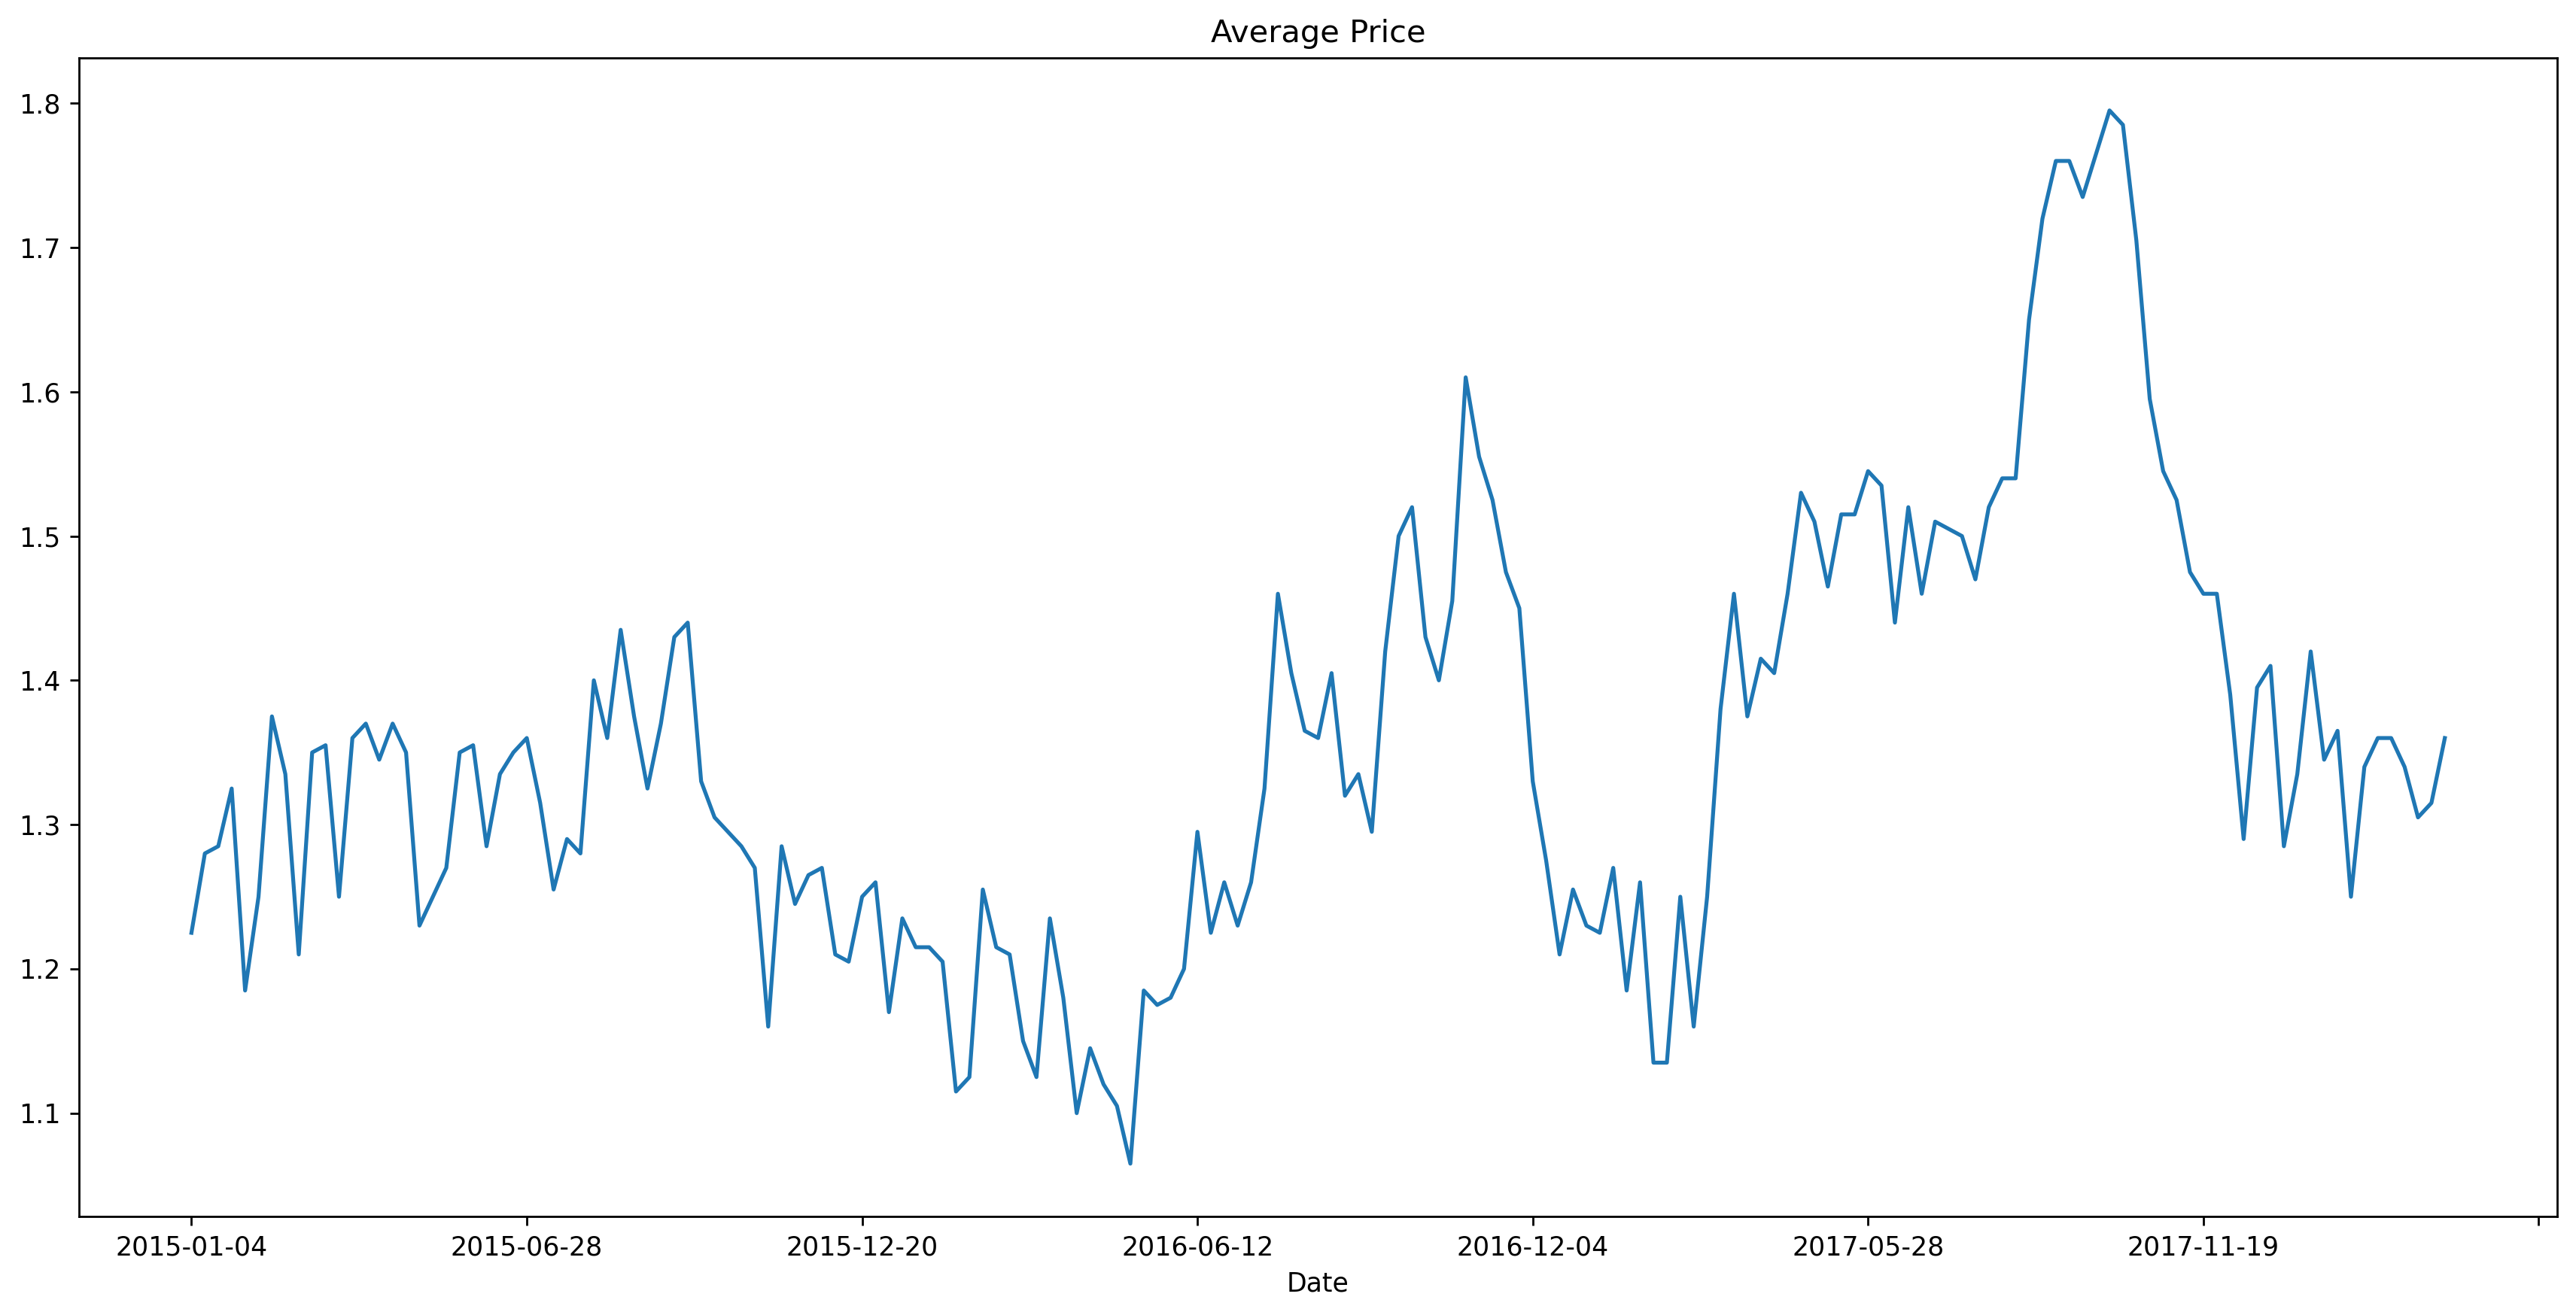

In [143]:
df1 = df.copy()
GroupBy=df1.groupby('Date').median()
plt.figure(figsize=(17,8),dpi=250)
GroupBy['Average_Price'].plot()
plt.title('Average Price')

Here we can see that  month in 'Date' column is important to predict the target feature 'Average_Price'.

# Converting Date into datetime format

In [144]:
df.Date = df.Date.apply(pd.to_datetime)

In [145]:
# Extracting Month only and dropping Date Column
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date', axis=1, inplace=True)

In [146]:
df.head(5)

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [147]:
#Changing months to Jan-Dec
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [148]:
df.head(5)

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NOV


In [149]:
df["Average_Price"].value_counts() 

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: Average_Price, Length: 259, dtype: int64

In [150]:
df["Year"].value_counts() 

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

Datas collected from 2015 t0 2018

In [151]:
df["Type"].value_counts()

conventional    9126
organic         9123
Name: Type, dtype: int64

Avacados of two types Conventional and Organic.

In [152]:
df["Region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

All 54 Regions has same no. of datas

In [153]:
#Statistical summary of Numerical datas
df.describe()

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Checking for duplicate datas

In [32]:
df.duplicated().sum()

0

In [33]:
df[df.duplicated()]

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month


Here, we can see that no duplicates found.

# Data Visualisation

Univariant Analysis

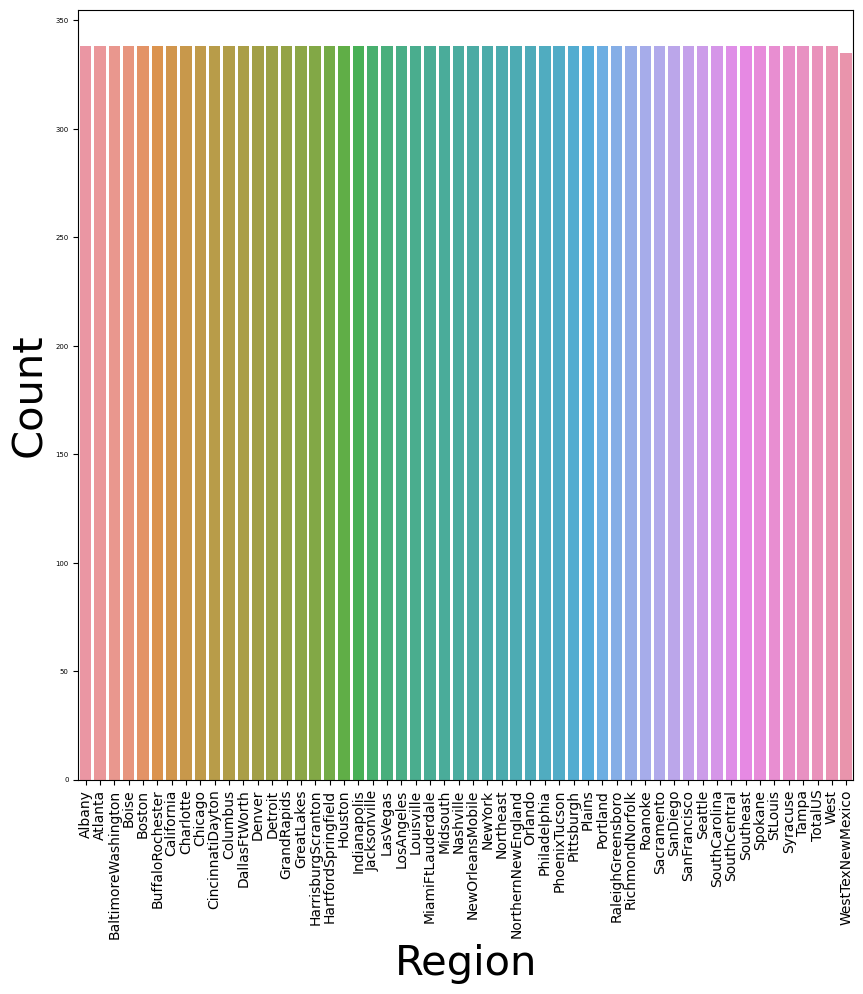

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(x='Region', data =df)
plt.xlabel('Region', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yticks(size=5)
plt.xticks(rotation=90)
plt.show()
print(df['Region'].value_counts())

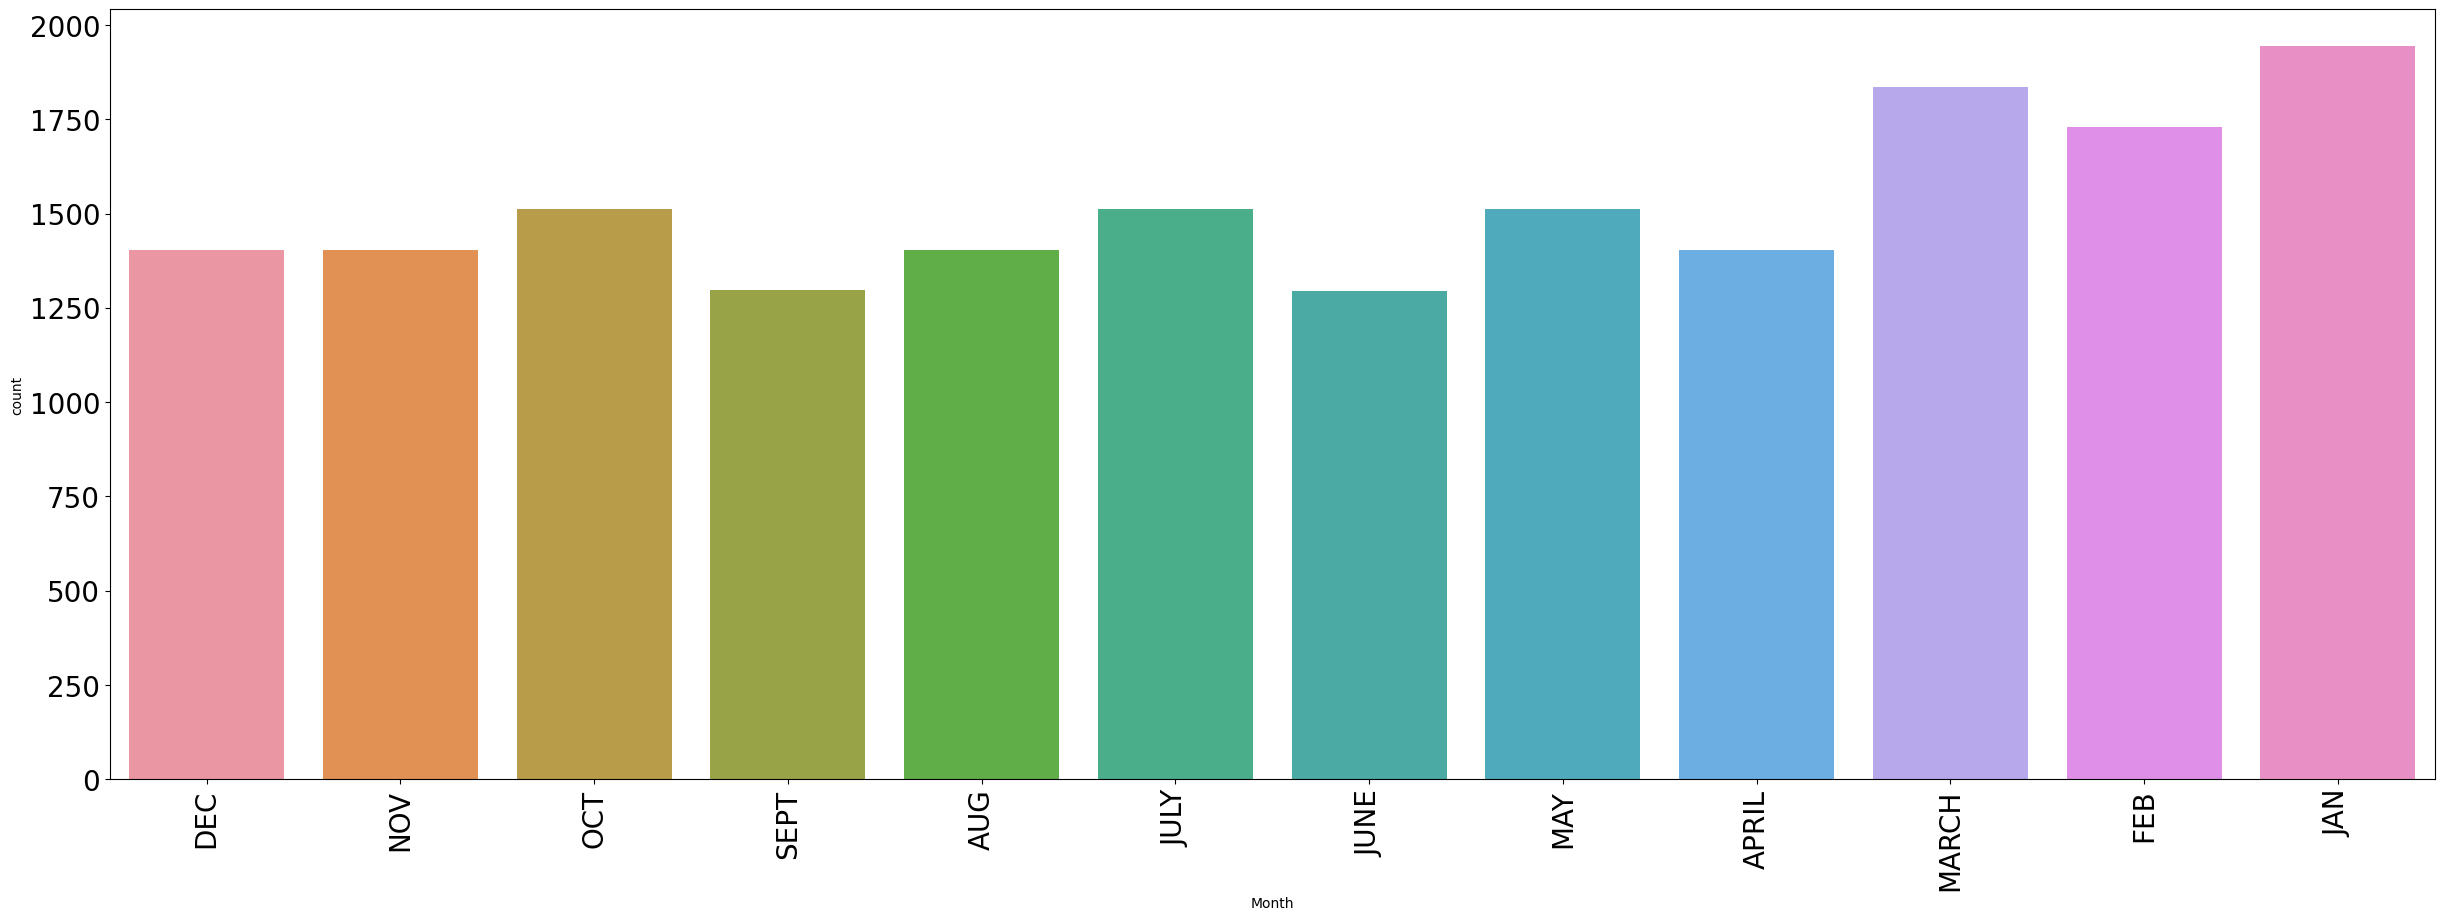

In [35]:
plt.figure(figsize = (30,10))
sns.countplot(x='Month', data =df)
plt.xticks(rotation=90)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

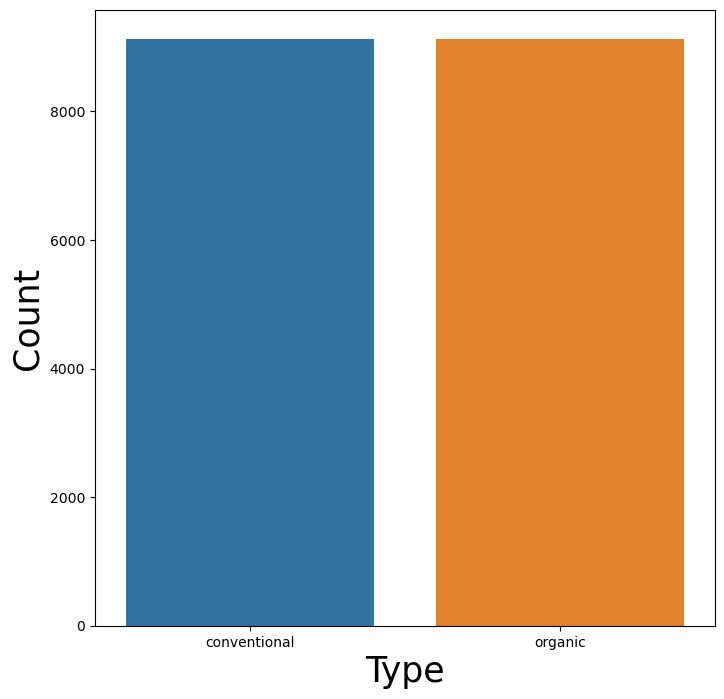

conventional    9126
organic         9123
Name: Type, dtype: int64


In [36]:
plt.figure(figsize = (8,8))
sns.countplot(x='Type', data =df)
plt.xlabel('Type', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()
print(df['Type'].value_counts())

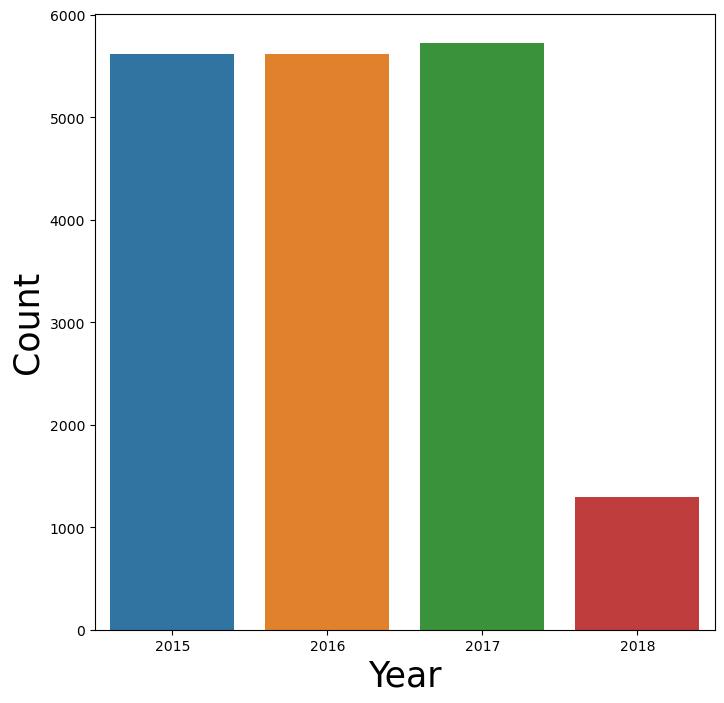

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


In [37]:
plt.figure(figsize = (8,8))
sns.countplot(x='Year', data =df)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()
print(df['Year'].value_counts())

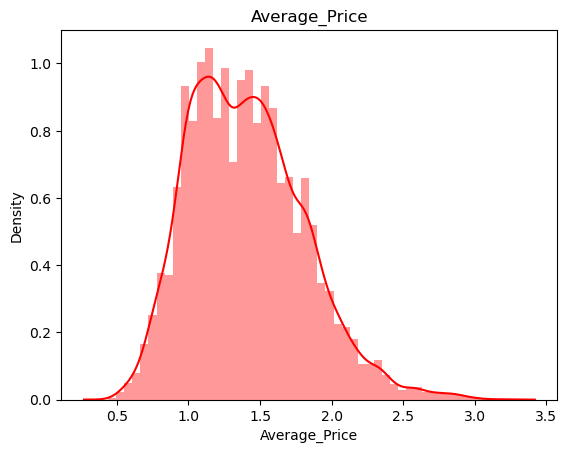

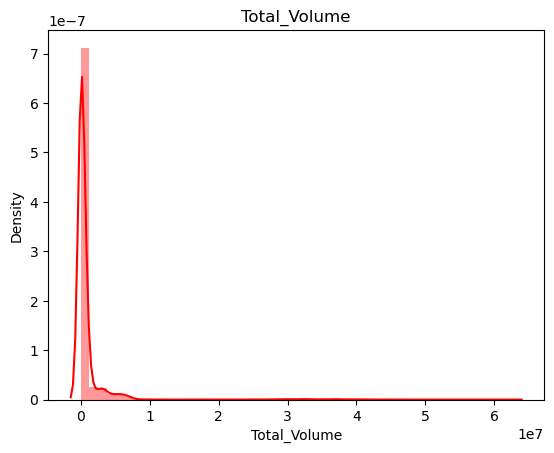

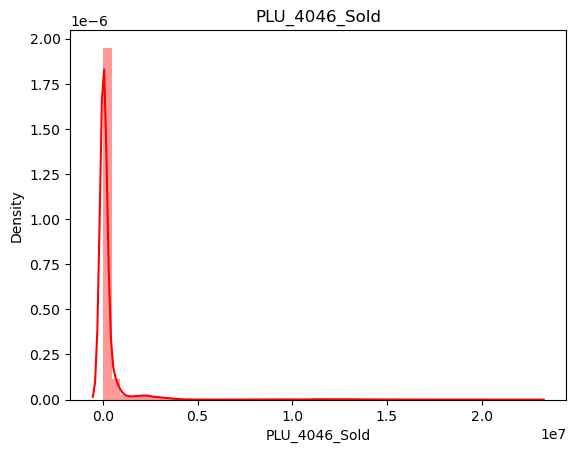

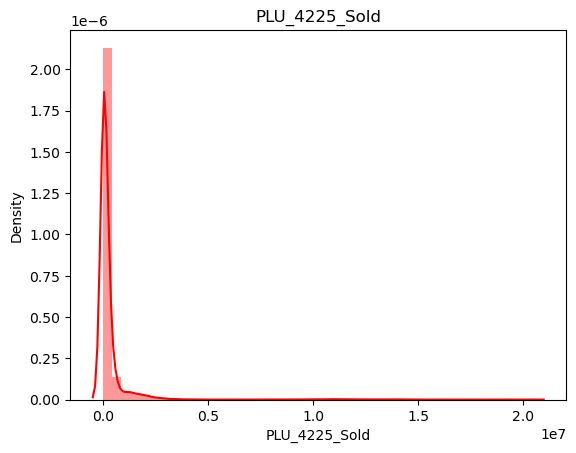

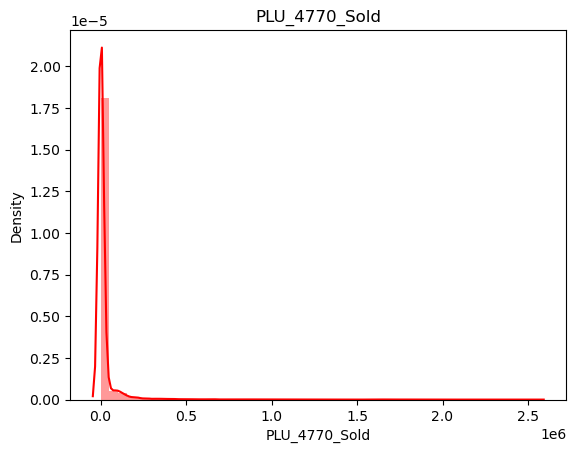

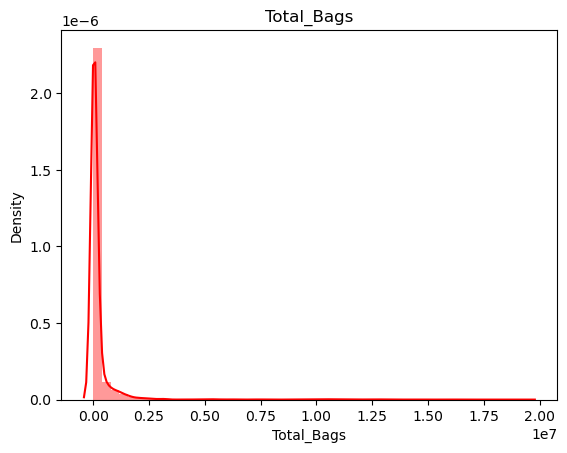

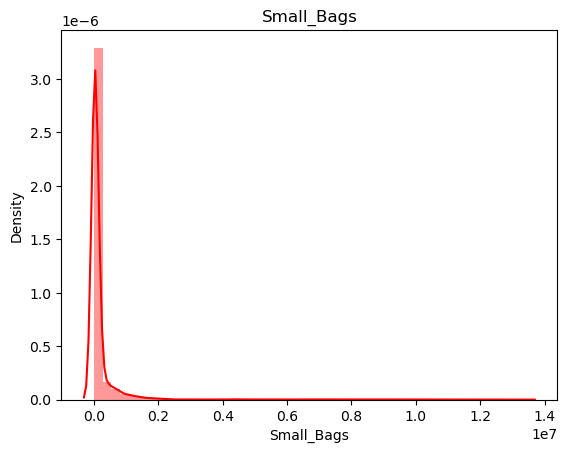

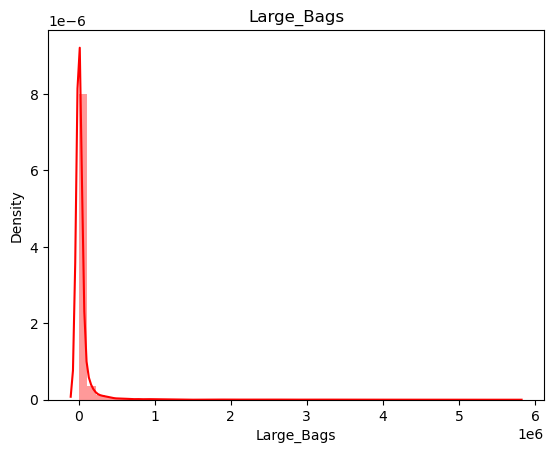

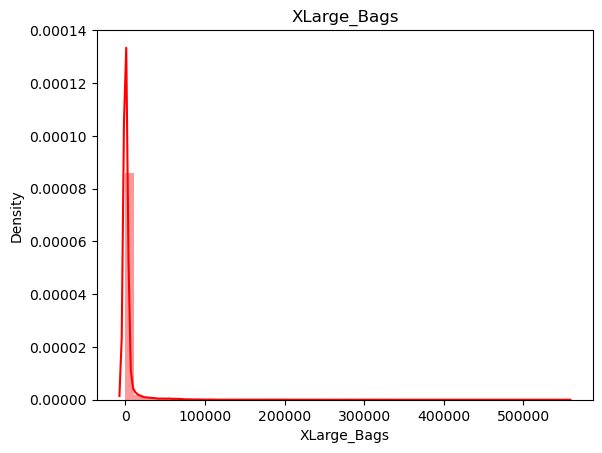

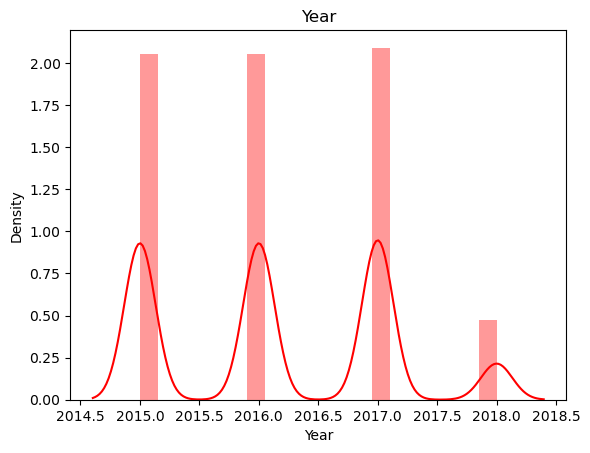

In [38]:
for i in df.columns :
    if df[i].dtype!=object:
        sns.distplot(df[i] , kde = True , color = 'red' )
        plt.title(i)
        plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

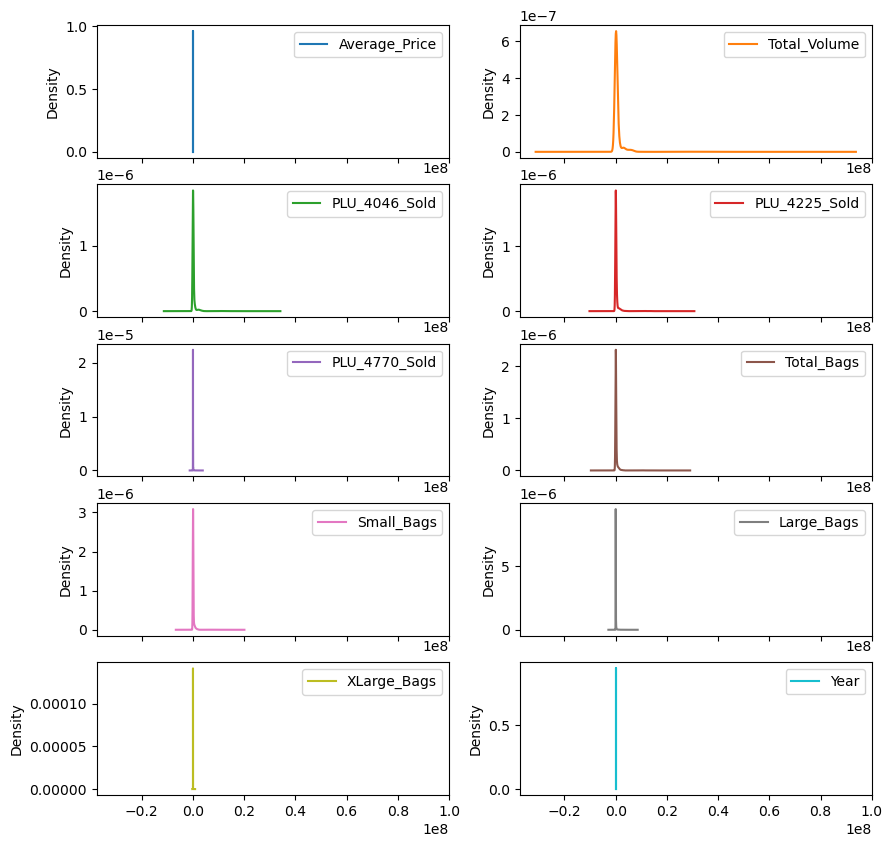

In [39]:
plot = df.plot(kind='kde', subplots=True, layout=(5,2), figsize=(10,10))
plot

Bivariant Analyis

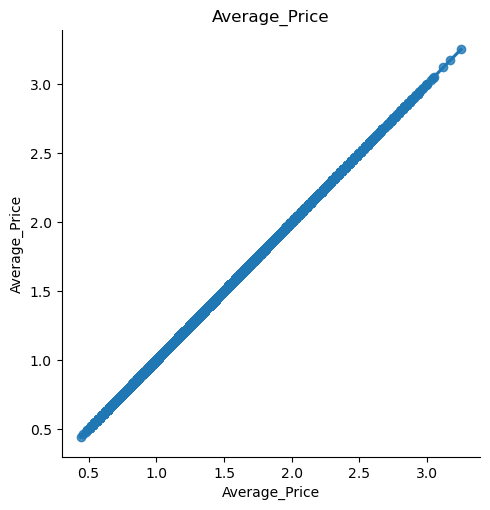

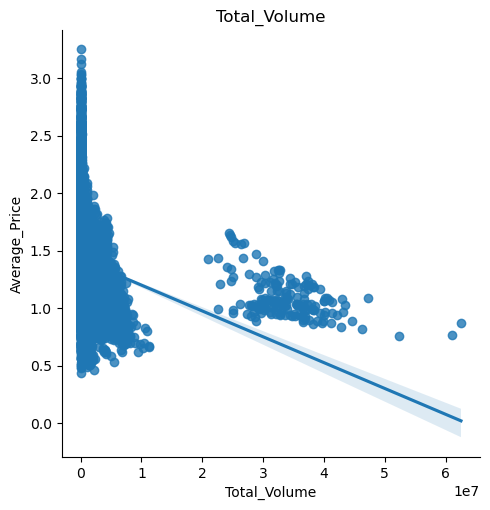

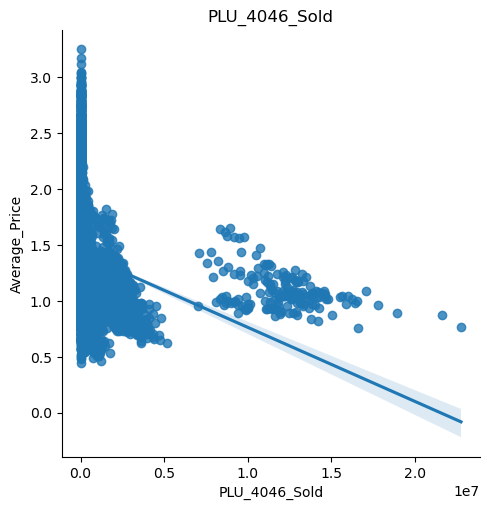

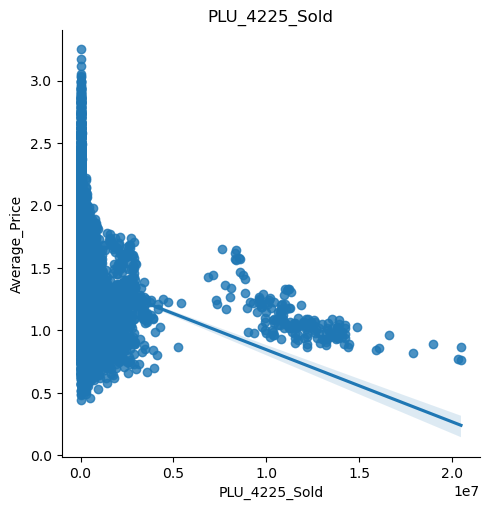

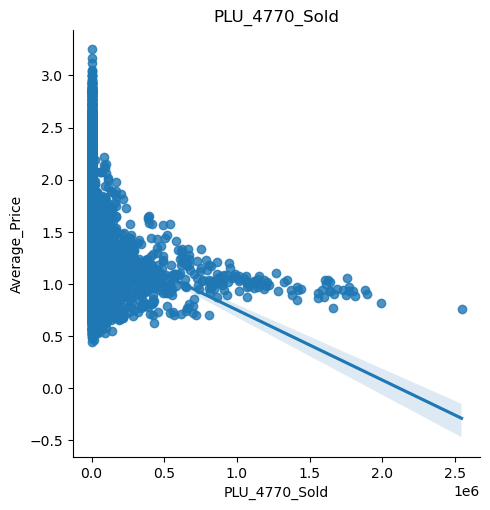

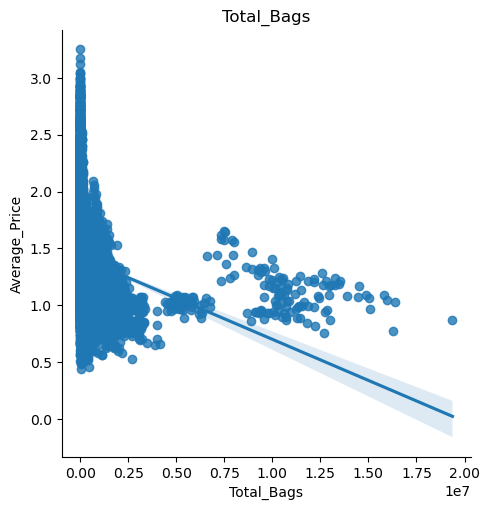

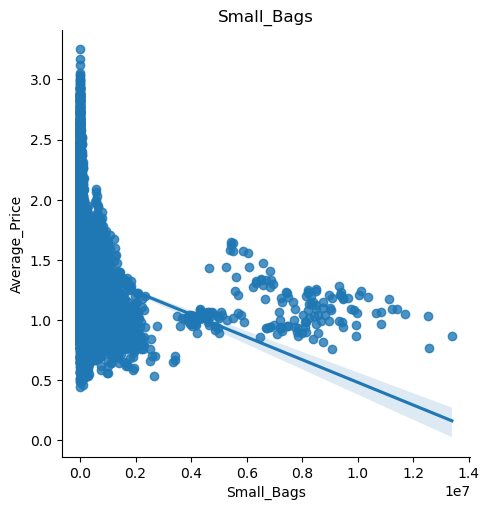

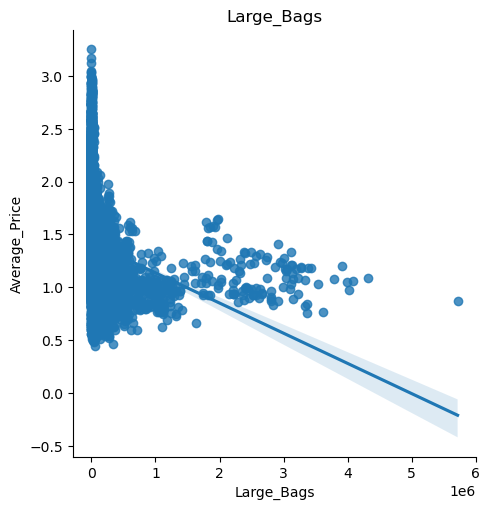

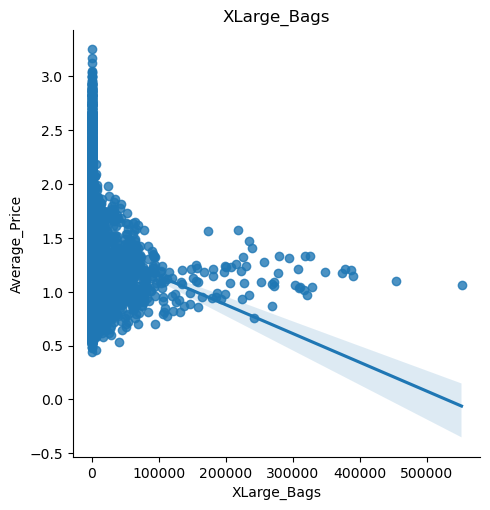

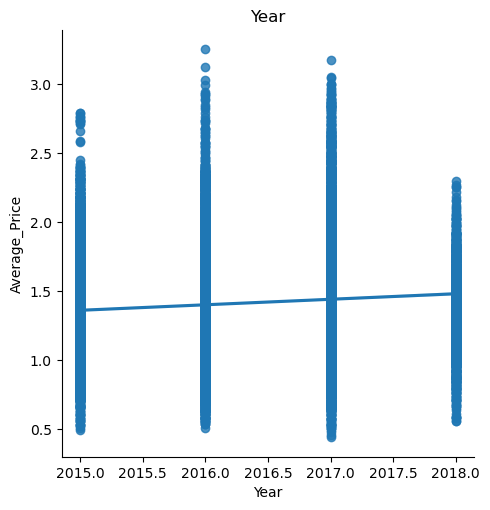

In [40]:
for i in df.columns :
    if df[i].dtype!=object:
        sns.lmplot(x=i, y='Average_Price', data =df)
        plt.xlabel(i)
        plt.ylabel("Average_Price")
        plt.title(i)
        plt.show()

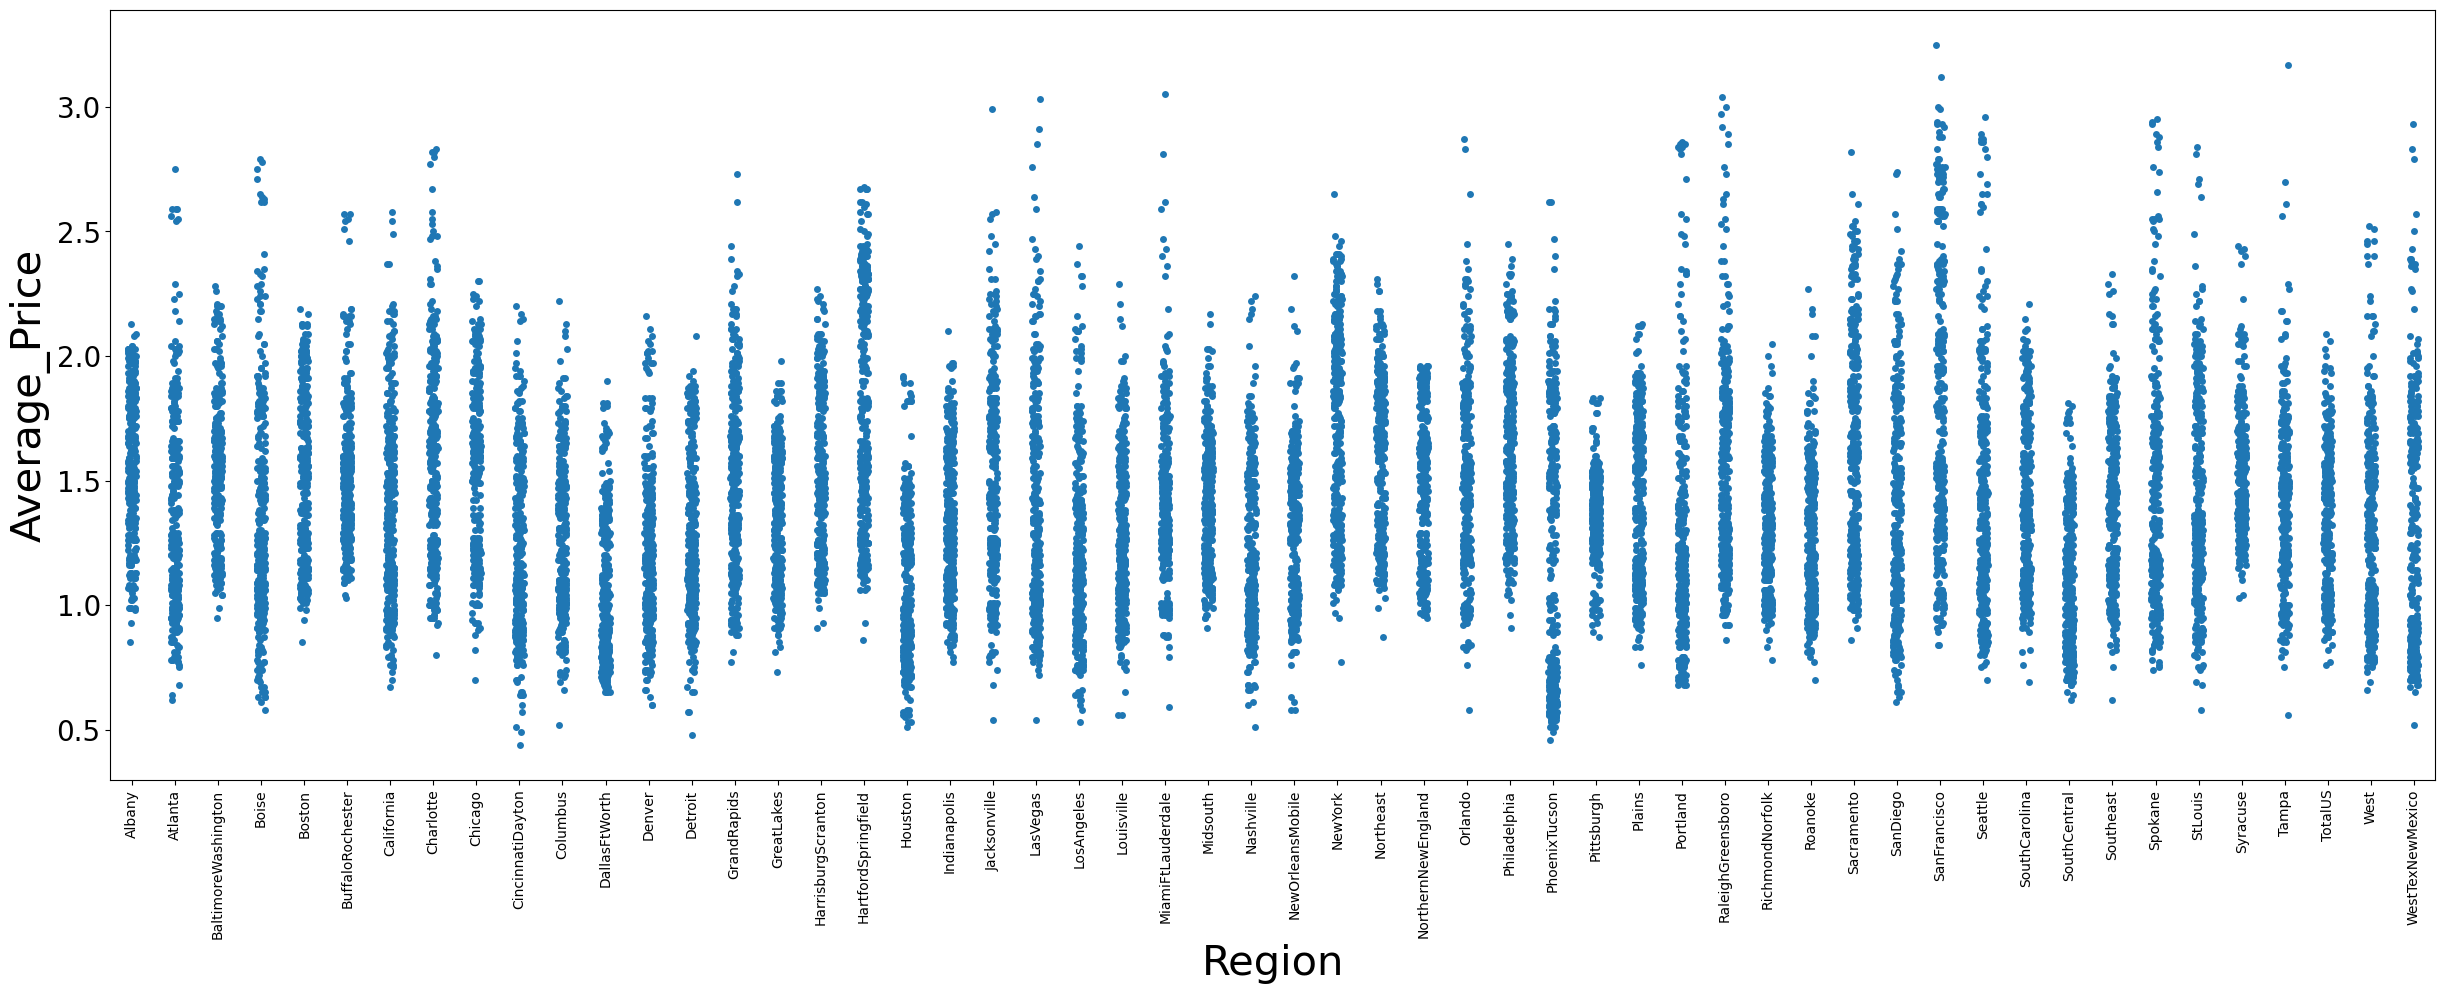

In [41]:
plt.figure(figsize = (30,10))
sns.stripplot(x='Region', y='Average_Price', data =df)
plt.xlabel('Region', fontsize=30)
plt.ylabel('Average_Price', fontsize=30)
plt.yticks(size=20)
plt.xticks(rotation=90)
plt.show()

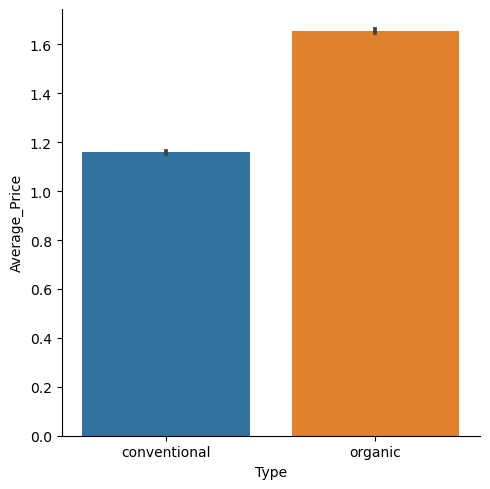

In [42]:
sns.catplot(x='Type',y='Average_Price',data=df,kind='bar')

Average Price of Avacado of Organic type is larger.

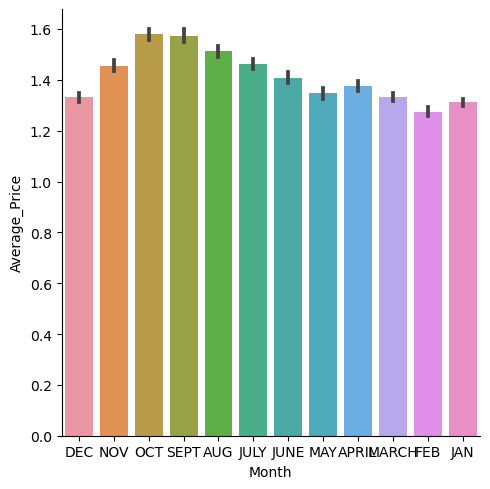

In [43]:
sns.catplot(x='Month',y='Average_Price',data=df,kind='bar')

Out of all the months, Average_Price of Avacado in October month is more.

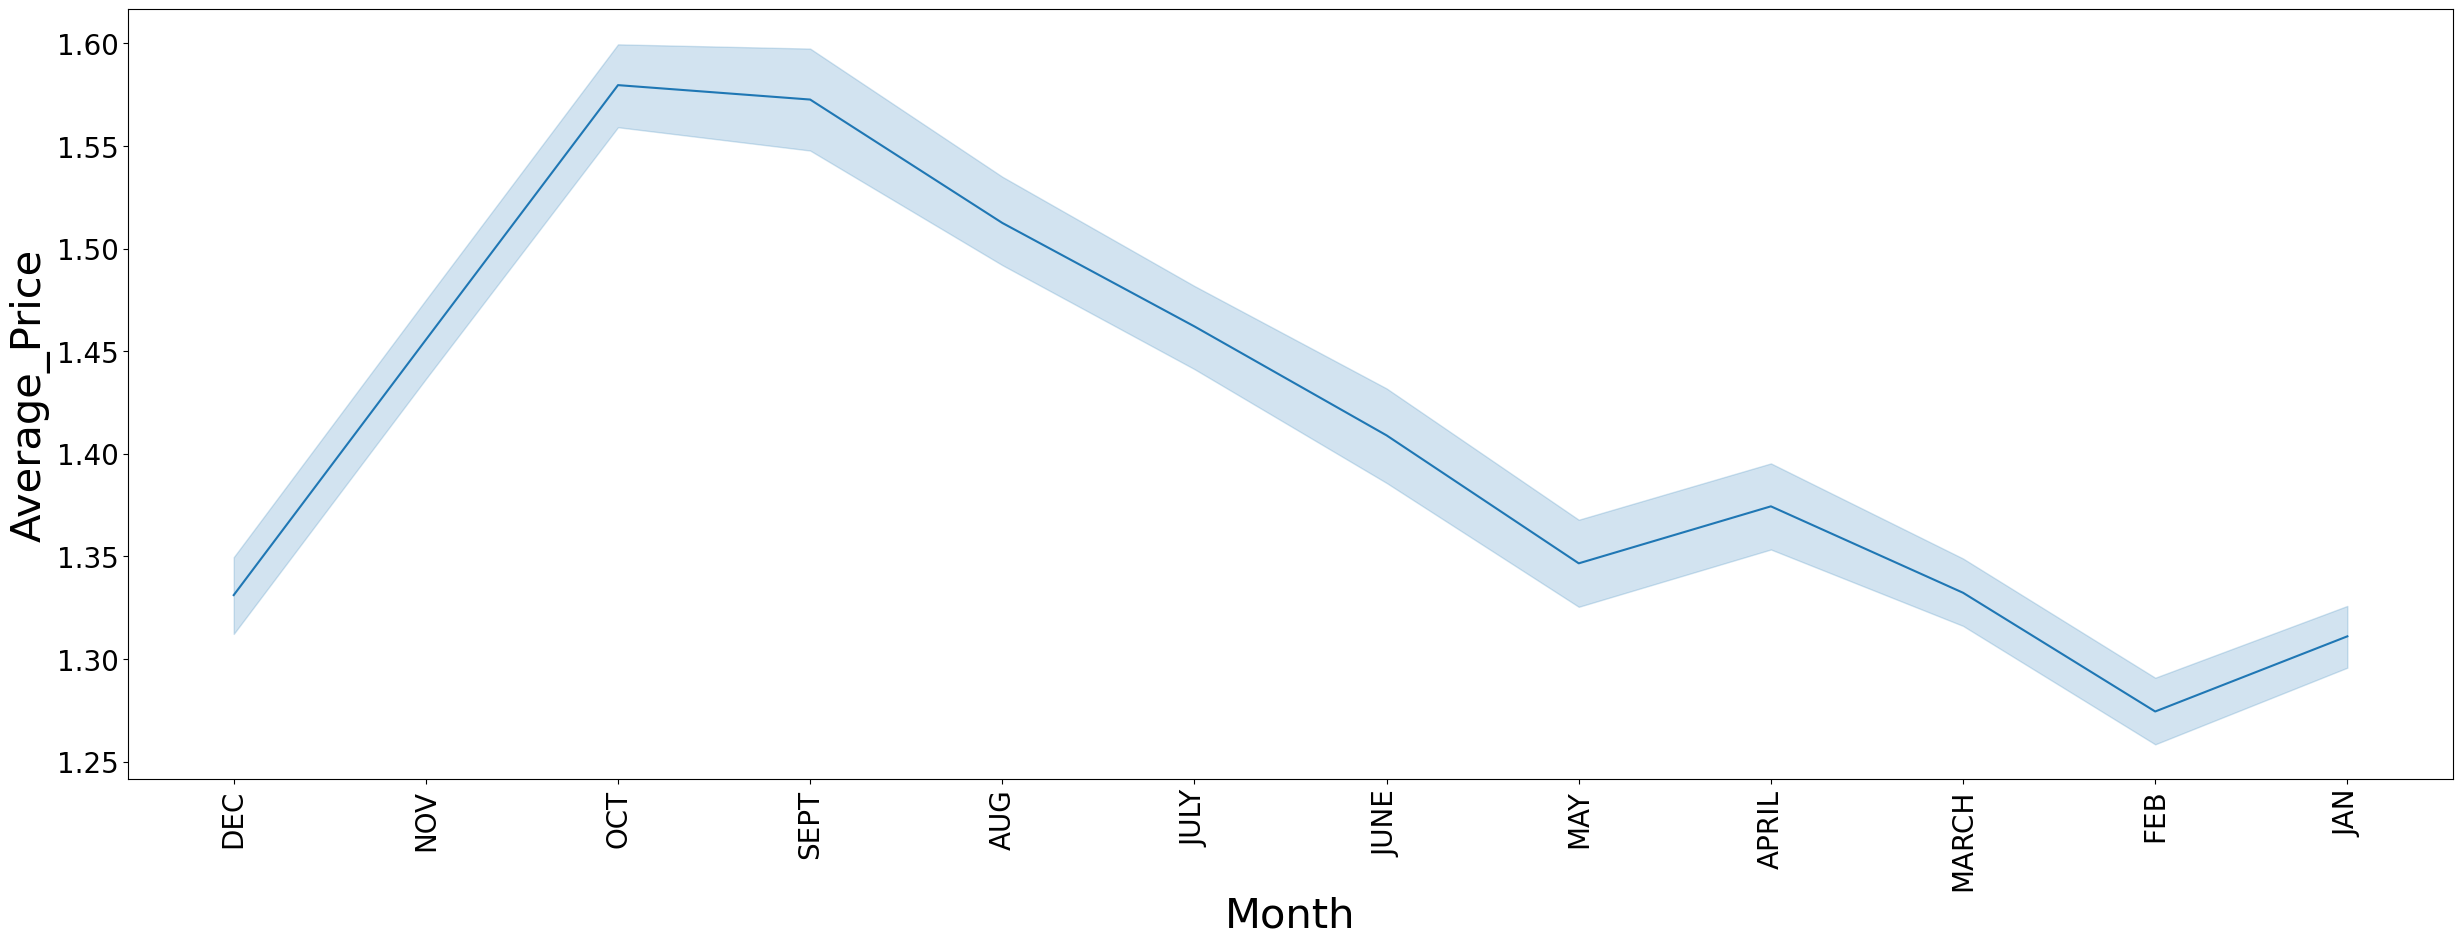

In [44]:
plt.figure(figsize = (30,10))
sns.lineplot(x='Month',y='Average_Price',data=df)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Average_Price', fontsize=30)
plt.yticks(size=20)
plt.xticks(size=20)
plt.xticks(rotation=90)
plt.show()

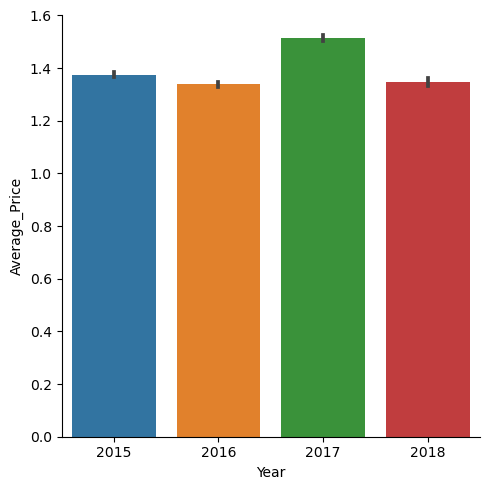

In [45]:
sns.catplot(x='Year',y='Average_Price',data=df,kind='bar')

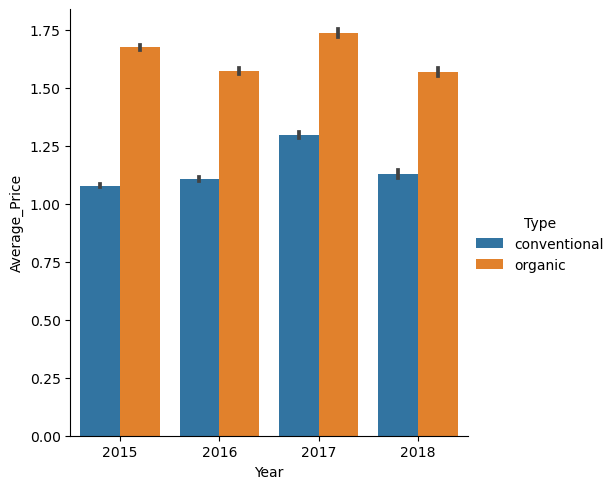

In [46]:
sns.catplot(x='Year',y='Average_Price', hue='Type',data=df,kind='bar')

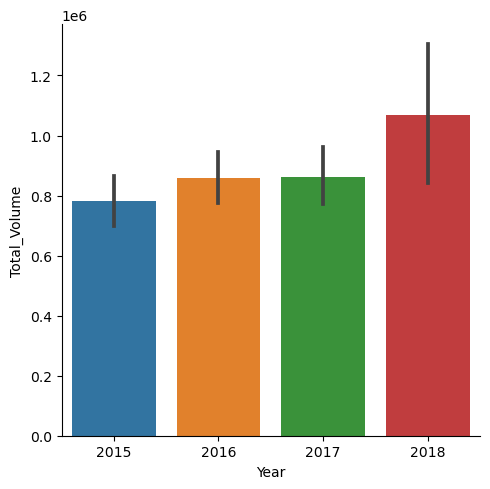

In [47]:
sns.catplot(x='Year',y='Total_Volume',data=df,kind='bar')

In [48]:
df.columns

Index(['Average_Price', 'Total_Volume', 'PLU_4046_Sold', 'PLU_4225_Sold',
       'PLU_4770_Sold', 'Total_Bags', 'Small_Bags', 'Large_Bags',
       'XLarge_Bags', 'Type', 'Year', 'Region', 'Month'],
      dtype='object')

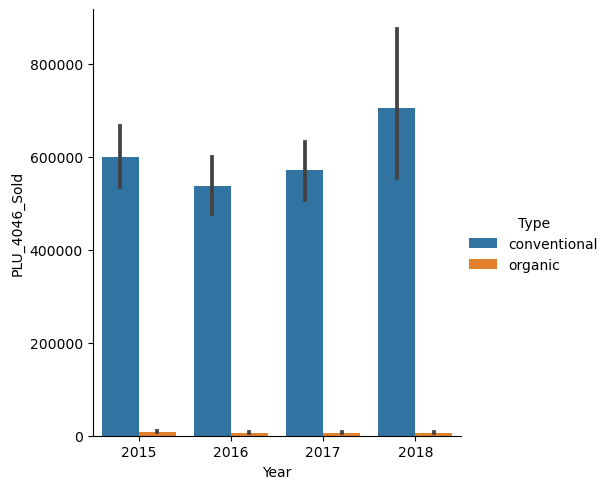

In [49]:
sns.catplot(x='Year',y='PLU_4046_Sold', hue='Type',data=df,kind='bar')

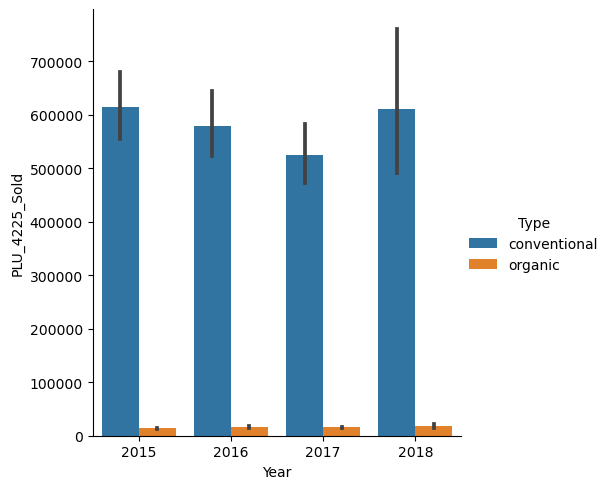

In [50]:
sns.catplot(x='Year',y='PLU_4225_Sold', hue='Type',data=df,kind='bar')

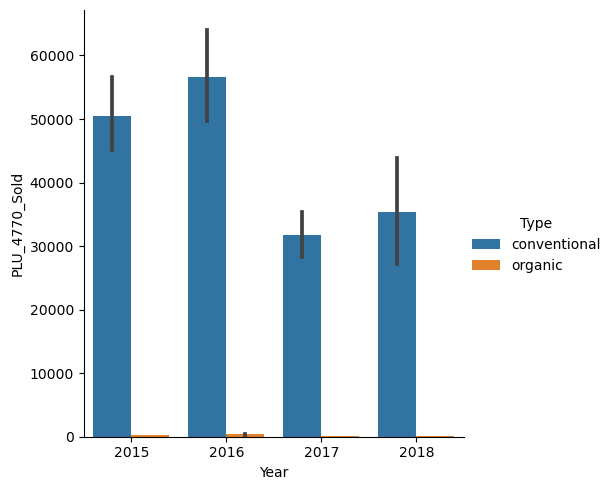

In [51]:
sns.catplot(x='Year',y='PLU_4770_Sold', hue='Type',data=df,kind='bar')

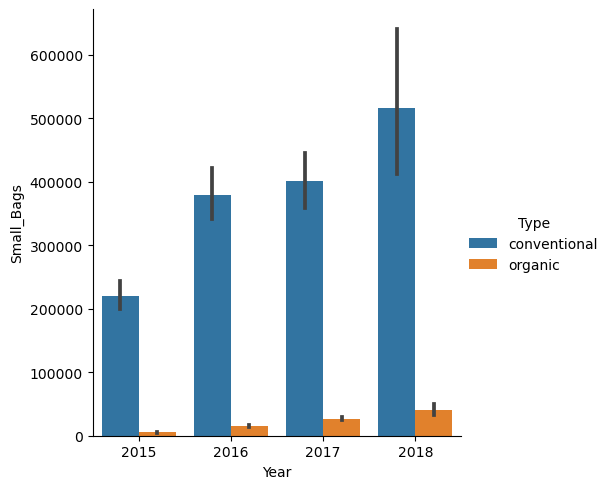

In [52]:
sns.catplot(x='Year',y='Small_Bags', hue='Type',data=df,kind='bar')

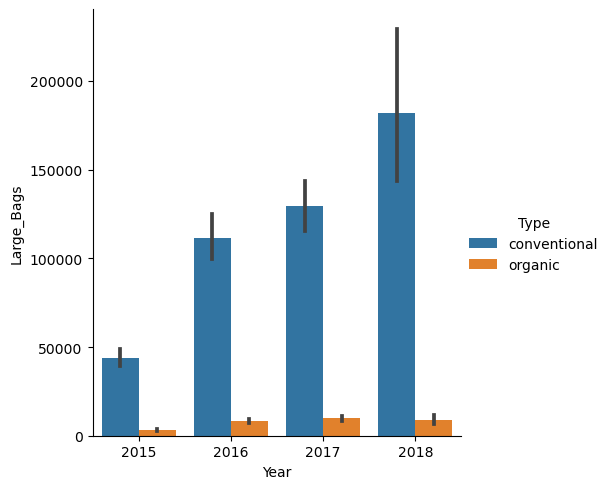

In [53]:
sns.catplot(x='Year',y='Large_Bags', hue='Type',data=df,kind='bar')

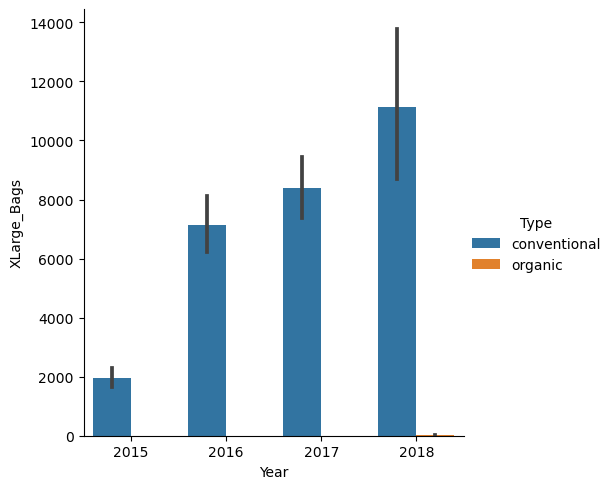

In [54]:
sns.catplot(x='Year',y='XLarge_Bags', hue='Type',data=df,kind='bar')

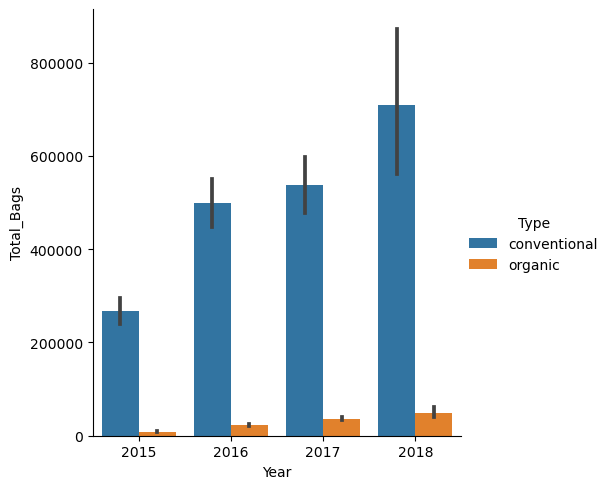

In [55]:
sns.catplot(x='Year',y='Total_Bags', hue='Type',data=df,kind='bar')

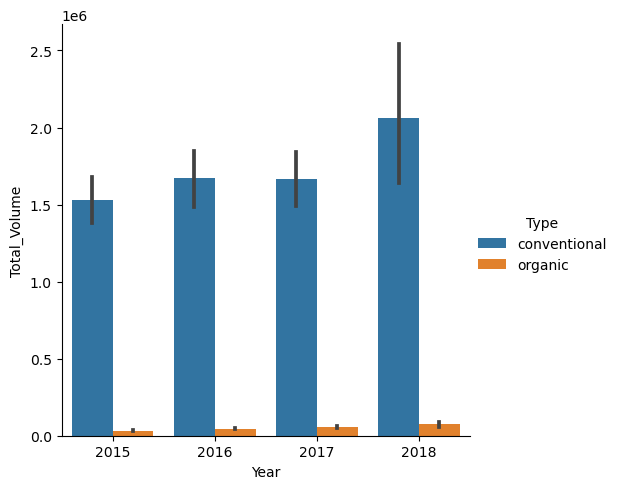

In [56]:
sns.catplot(x='Year',y='Total_Volume', hue='Type',data=df,kind='bar')

Volume of Conventional type avacados are more than Organic type.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  18249 non-null  float64
 1   Total_Volume   18249 non-null  float64
 2   PLU_4046_Sold  18249 non-null  float64
 3   PLU_4225_Sold  18249 non-null  float64
 4   PLU_4770_Sold  18249 non-null  float64
 5   Total_Bags     18249 non-null  float64
 6   Small_Bags     18249 non-null  float64
 7   Large_Bags     18249 non-null  float64
 8   XLarge_Bags    18249 non-null  float64
 9   Type           18249 non-null  object 
 10  Year           18249 non-null  int64  
 11  Region         18249 non-null  object 
 12  Month          18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [58]:
df['Region'].nunique()

54

# Encoding categorical column

Converting Categorical column to numerical

In [59]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [60]:
df.sample(15)

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
15425,1.49,18341.33,13842.27,3182.83,13.72,1302.51,1226.26,76.25,0.00,1.0,2017,12.0,4.0
14100,1.22,19360.95,1677.44,9129.99,3.17,8550.35,8543.30,7.05,0.00,1.0,2016,41.0,0.0
7591,1.54,273060.96,70581.38,111227.45,4434.42,86817.71,82873.27,3944.44,0.00,0.0,2017,37.0,11.0
6065,1.54,880107.48,82890.07,504037.61,168507.26,124672.54,122061.96,658.36,1952.22,0.0,2017,8.0,5.0
1834,1.16,1386951.96,611683.23,506379.84,15441.14,253447.75,237139.11,15090.36,1218.28,0.0,2015,35.0,11.0
12193,1.51,1098.66,1.22,264.40,0.00,833.04,806.66,26.38,0.00,1.0,2016,5.0,2.0
13174,1.72,1023.51,31.66,831.75,0.00,160.10,16.67,143.43,0.00,1.0,2016,23.0,3.0
15050,1.93,2099.67,4.86,606.04,0.00,1488.77,966.18,522.59,0.00,1.0,2017,5.0,3.0
1782,1.19,74826.22,1137.38,44085.07,1176.81,28426.96,19393.09,9033.87,0.00,0.0,2015,34.0,11.0
5251,1.06,3280451.38,2208431.81,339054.70,17650.77,715314.10,482358.65,232943.41,12.04,0.0,2016,46.0,4.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  18249 non-null  float64
 1   Total_Volume   18249 non-null  float64
 2   PLU_4046_Sold  18249 non-null  float64
 3   PLU_4225_Sold  18249 non-null  float64
 4   PLU_4770_Sold  18249 non-null  float64
 5   Total_Bags     18249 non-null  float64
 6   Small_Bags     18249 non-null  float64
 7   Large_Bags     18249 non-null  float64
 8   XLarge_Bags    18249 non-null  float64
 9   Type           18249 non-null  float64
 10  Year           18249 non-null  int64  
 11  Region         18249 non-null  float64
 12  Month          18249 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


In [62]:
df.describe()

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,5.449833
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.347808
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,5.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,8.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,11.000000


Here, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas.
    2.The counts are same, so missing/null values.
    3.The mean and median are not equal, so skewness is present. 
    4.There is also huge difference between 75% and max in some
      columns,so outliers are present.   

In [63]:
df.corr()

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
Average_Price,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.119089
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.012003
PLU_4046_Sold,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.013348
PLU_4225_Sold,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.008662
PLU_4770_Sold,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012535
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.012969
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.013886
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.008635
XLarge_Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.018272
Type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000038


<Axes: >

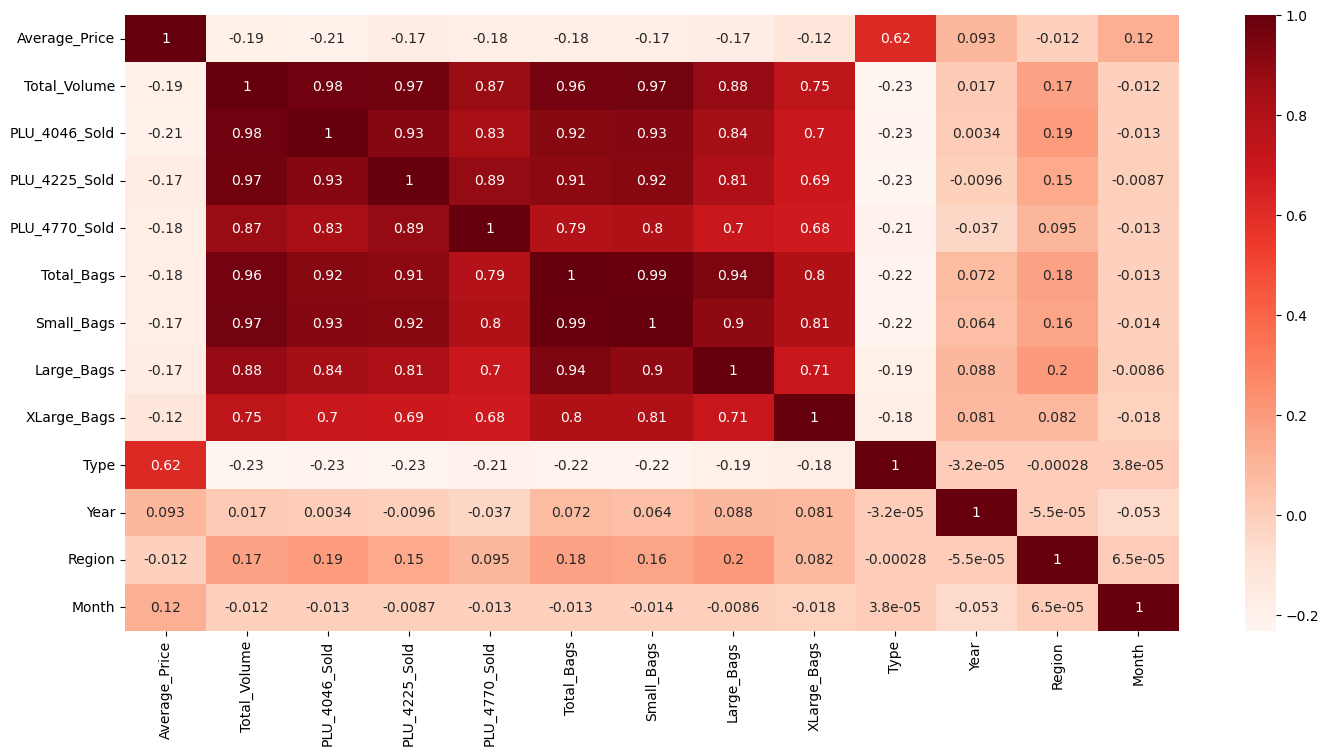

In [64]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

From the above, we can see that

1) The features 'Total_Volume', 'PLU_4046_Sold', 'PLU_4225_Sold' and 'PLU_4770_Sold' has very high correlation with each other.
2) The features 'Total_Bags', 'Small_Bags', 'Large_Bags' and 'XLarge_Bags' has very high correlation with each other.
3) The target variable 'Average_Price' has  high positive correlation with feature 'Type'.

# Checking Outliers

Average_Price       Axes(0.125,0.786098;0.352273x0.0939024)
Total_Volume     Axes(0.547727,0.786098;0.352273x0.0939024)
PLU_4046_Sold       Axes(0.125,0.673415;0.352273x0.0939024)
PLU_4225_Sold    Axes(0.547727,0.673415;0.352273x0.0939024)
PLU_4770_Sold       Axes(0.125,0.560732;0.352273x0.0939024)
Total_Bags       Axes(0.547727,0.560732;0.352273x0.0939024)
Small_Bags          Axes(0.125,0.448049;0.352273x0.0939024)
Large_Bags       Axes(0.547727,0.448049;0.352273x0.0939024)
XLarge_Bags         Axes(0.125,0.335366;0.352273x0.0939024)
Type             Axes(0.547727,0.335366;0.352273x0.0939024)
Year                Axes(0.125,0.222683;0.352273x0.0939024)
Region           Axes(0.547727,0.222683;0.352273x0.0939024)
Month                   Axes(0.125,0.11;0.352273x0.0939024)
dtype: object

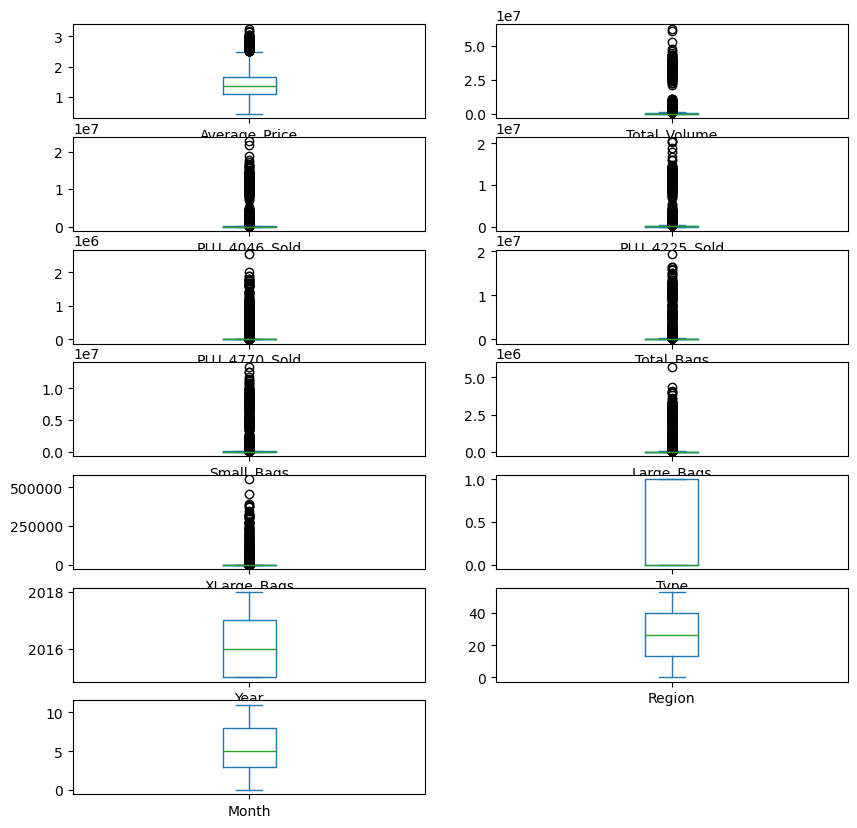

In [65]:
plot = df.plot(kind='box', subplots=True, layout=(7,2), figsize=(10,10))
plot

As, we can see that outliers are present.

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836,1.221282,1.700252,1.030503
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836,1.221282,1.700252,1.030503
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836,1.221282,1.700252,1.030503
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836,1.221282,1.700252,1.030503
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836,1.221282,1.700252,1.060474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164,1.970504,1.700811,0.731792
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164,1.970504,1.700811,0.433081
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164,1.970504,1.700811,0.433081
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164,1.970504,1.700811,0.433081


In [67]:
# threshold =3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [68]:
z.iloc[346,1]

2.234544829955079

In [69]:
df_new=df[(z<3).all(axis=1)]

In [70]:
df_new

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,2.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,2.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,2.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,2.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,3.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,4.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,4.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,4.0


In [71]:
df.shape

(18249, 13)

In [72]:
df_new.shape

(17651, 13)

In [73]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  3.276891884486821


In [74]:
df=df_new

In [75]:
df.shape

(17651, 13)

# Checking Skewness

In [76]:
df.skew()

Average_Price    0.377432
Total_Volume     3.767138
PLU_4046_Sold    4.909848
PLU_4225_Sold    4.455745
PLU_4770_Sold    5.117170
Total_Bags       4.066771
Small_Bags       4.222706
Large_Bags       5.053434
XLarge_Bags      6.135607
Type            -0.037741
Year             0.229976
Region           0.012798
Month            0.029197
dtype: float64

In [77]:
df['PLU_4046_Sold'] = np.cbrt(df['PLU_4046_Sold'])
df['XLarge_Bags'] = np.cbrt(df['XLarge_Bags'])
df['PLU_4225_Sold'] = np.cbrt(df['PLU_4225_Sold'])
df['PLU_4770_Sold'] = np.cbrt(df['PLU_4770_Sold'])
df['Total_Bags'] = np.cbrt(df['Total_Bags'])
df['Total_Volume'] = np.cbrt(df['Total_Volume'])
df['Large_Bags'] = np.cbrt(df['Large_Bags'])
df['Small_Bags'] = np.cbrt(df['Small_Bags'])

In [78]:
df.skew()

Average_Price    0.377432
Total_Volume     1.240435
PLU_4046_Sold    1.555876
PLU_4225_Sold    1.277025
PLU_4770_Sold    1.635614
Total_Bags       1.231831
Small_Bags       1.246033
Large_Bags       1.276213
XLarge_Bags      2.277028
Type            -0.037741
Year             0.229976
Region           0.012798
Month            0.029197
dtype: float64

Here, we can see that skewness are removed.

# Splitting target variable

In [79]:
df.head()

,Average_Price,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,0.0,2.0
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,0.0,2.0
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,0.0,2.0
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,0.0,2.0
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,0.0,9.0


In [80]:
x = df.drop("Average_Price", axis = 1)
y= df['Average_Price']

In [81]:
x

,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,0.0,2.0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,0.0,2.0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,0.0,2.0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,0.0,2.0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,2018,53.0,3.0
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,2018,53.0,4.0
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,2018,53.0,4.0
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,2018,53.0,4.0


In [82]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: Average_Price, Length: 17651, dtype: float64

# To remove biasness, we use Standard scaler method

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Total_Volume,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,-1.695495,-1.029537
1,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,-1.695495,-1.029537
2,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,-1.695495,-1.029537
3,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,-1.695495,-1.029537
4,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,-1.695495,1.062882
...,...,...,...,...,...,...,...,...,...,...,...,...
17646,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,1.747054,-0.730620
17647,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,1.747054,-0.431703
17648,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,1.747054,-0.431703
17649,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,1.747054,-0.431703


# Checking multicollinearity

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,202.612015,Total_Volume
1,24.873526,PLU_4046_Sold
2,40.475007,PLU_4225_Sold
3,3.301348,PLU_4770_Sold
4,117.525195,Total_Bags
5,63.623668,Small_Bags
6,9.031718,Large_Bags
7,1.968987,XLarge_Bags
8,2.184117,Type
9,1.321629,Year


By Checking the Vif values, we can see that  multicollinearity present between 'Total_Volume', 'PLU_4225_Sold' and 'PLU_4046_Sold'. So we will remove 'Total_Volume' and check

In [85]:
x.drop(['Total_Volume'], axis=1, inplace=True)

In [86]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,4.144045,PLU_4046_Sold
1,5.604322,PLU_4225_Sold
2,3.269586,PLU_4770_Sold
3,98.851303,Total_Bags
4,63.561921,Small_Bags
5,9.031686,Large_Bags
6,1.955153,XLarge_Bags
7,2.167611,Type
8,1.321090,Year
9,1.089661,Region


By Checking the Vif values, we can see that multicollinearity present between 'Total_Bags', 'Small_Bags' and 'Large_Bags'. So we will remove 'Total_Bags' and check

In [87]:
x.drop(['Total_Bags'], axis=1, inplace=True)

In [88]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,4.143986,PLU_4046_Sold
1,5.478986,PLU_4225_Sold
2,3.269569,PLU_4770_Sold
3,6.542899,Small_Bags
4,2.117604,Large_Bags
5,1.934963,XLarge_Bags
6,2.167417,Type
7,1.315921,Year
8,1.089422,Region
9,1.004282,Month


Now, we can see that multicollinearity between the features has been removed. Now we go for Model Building.

# Model Building

Finding best random state

In [1543]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1544]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxRS)

The best r2_score is  0.49932542616218656 at random state  6


Train Test Split

In [1545]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [1546]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [1547]:
#checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
pred_train_LR = LR.predict(x_train)
print('R2_score : ', r2_score(y_test,predLR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLR))
print('Mean Squared Error : ', mean_squared_error(y_test,predLR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLR)))

R2_score :  49.932542616218655
R2_score on training data :  46.83280307163161
Mean Absolute Error :  0.21451854982091656
Mean Squared Error :  0.07482864163950098
Root Mean Squared Error :  0.2735482437148902


In [1548]:
#checking accuracy for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
pred_train_RFR = RFR.predict(x_train)
print('R2_score : ', r2_score(y_test,predRFR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RFR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRFR))
print('Mean Squared Error : ', mean_squared_error(y_test,predRFR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRFR)))

R2_score :  87.08146919932429
R2_score on training data :  98.10788581822628
Mean Absolute Error :  0.09658969033232628
Mean Squared Error :  0.01930747360271903
Root Mean Squared Error :  0.13895133537580354


In [1549]:
#checking accuracy for ExtraTreesRegressor
ETC = ExtraTreesRegressor()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
pred_train_ETC = ETC.predict(x_train)
print('R2_score : ', r2_score(y_test,predETC)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ETC)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predETC))
print('Mean Squared Error : ', mean_squared_error(y_test,predETC))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predETC)))

R2_score :  89.81778980226103
R2_score on training data :  100.0
Mean Absolute Error :  0.08603695241691842
Mean Squared Error :  0.01521788798149546
Root Mean Squared Error :  0.12336080407283126


In [1550]:
#checking accuracy for GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR = GBR.predict(x_test)
pred_train_GBR = GBR.predict(x_train)
print('R2_score : ', r2_score(y_test,predGBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_GBR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predGBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predGBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predGBR)))

R2_score :  73.78422253443063
R2_score on training data :  74.24686656933478
Mean Absolute Error :  0.15018276051250543
Mean Squared Error :  0.039180959445075776
Root Mean Squared Error :  0.19794180822927676


In [1551]:
#checking accuracy for AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR = ABR.predict(x_test)
pred_train_ABR = ABR.predict(x_train)
print('R2_score : ', r2_score(y_test,predABR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ABR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predABR))
print('Mean Squared Error : ', mean_squared_error(y_test,predABR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predABR)))

R2_score :  56.343607876693646
R2_score on training data :  55.7007177029881
Mean Absolute Error :  0.20309398994433378
Mean Squared Error :  0.06524694266832576
Root Mean Squared Error :  0.2554348109955371


In [1552]:
#checking accuracy for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
pred_train_BR = BR.predict(x_train)
print('R2_score : ', r2_score(y_test,predBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_BR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predBR)))

R2_score :  85.25991009188203
R2_score on training data :  97.10542690840101
Mean Absolute Error :  0.10378927492447128
Mean Squared Error :  0.02202989652567976
Root Mean Squared Error :  0.1484247166939515


In [1553]:
#checking accuracy for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
pred_train_DTR = DTR.predict(x_train)
print('R2_score : ', r2_score(y_test,predDTR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_DTR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predDTR))
print('Mean Squared Error : ', mean_squared_error(y_test,predDTR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predDTR)))

R2_score :  72.51643706344086
R2_score on training data :  100.0
Mean Absolute Error :  0.1347715256797583
Mean Squared Error :  0.04107573640483384
Root Mean Squared Error :  0.20267149874818077


In [1554]:
#checking accuracy for KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
pred_train_KNN = KNN.predict(x_train)
print('R2_score : ', r2_score(y_test,predKNN)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_KNN)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predKNN))
print('Mean Squared Error : ', mean_squared_error(y_test,predKNN))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predKNN)))

R2_score :  82.36831469426602
R2_score on training data :  88.62934766918174
Mean Absolute Error :  0.11658723564954683
Mean Squared Error :  0.02635154909365559
Root Mean Squared Error :  0.16233160226417895


In [1555]:
#checking accuracy for Lasso
LA = Lasso()
LA.fit(x_train,y_train)
predLA = LA.predict(x_test)
pred_train_LA = LA.predict(x_train)
print('R2_score : ', r2_score(y_test,predLA)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LA)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLA))
print('Mean Squared Error : ', mean_squared_error(y_test,predLA))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLA)))

R2_score :  -0.011315811836598577
R2_score on training data :  0.0
Mean Absolute Error :  0.3158006885918956
Mean Squared Error :  0.1494725576618381
Root Mean Squared Error :  0.3866168098541993


In [1556]:
#checking accuracy for Ridge
RD = Ridge()
RD.fit(x_train,y_train)
predRD = RD.predict(x_test)
pred_train_RD = RD.predict(x_train)
print('R2_score : ', r2_score(y_test,predRD)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RD)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRD))
print('Mean Squared Error : ', mean_squared_error(y_test,predRD))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRD)))

R2_score :  49.932289899562676
R2_score on training data :  46.83280185874099
Mean Absolute Error :  0.21451812609981102
Mean Squared Error :  0.07482901933881056
Root Mean Squared Error :  0.2735489340845812


# CROSS VALIDATION

In [1557]:
from sklearn.model_selection import cross_val_score

In [1558]:
#checking CV score for LinearRegression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLR) - score.mean())*100)

[-0.34295137  0.14037477  0.36921297  0.05063343  0.09118976]
0.06169190927484756
Difference between R2_score score and CV score is  43.7633516887339


In [1559]:
#checking CV score for RandomForestRegressor

score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRFR) - score.mean())*100)

[-0.15454916  0.486748    0.60094245  0.24862108  0.07416082]
0.2511846394628724
Difference between R2_score score and CV score is  61.96300525303705


In [1560]:
#checking CV score for ExtraTreesRegressor

score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predETC) - score.mean())*100)

[0.03055654 0.48327354 0.68032822 0.37499728 0.17463809]
0.34875873476856156
Difference between R2_score score and CV score is  54.94191632540487


In [1561]:
#checking CV score for GradientBoostingRegressor

score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predGBR) - score.mean())*100)

[0.13694409 0.59667987 0.65811136 0.33982679 0.20921951]
0.388156324997545
Difference between R2_score score and CV score is  34.968590034676126


In [1562]:
#checking CV score for AdaBoostRegressor

score = cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predABR) - score.mean())*100)

[-0.93034691  0.29652919  0.492527    0.07588039  0.14880157]
0.016678249404460742
Difference between R2_score score and CV score is  54.67578293624757


In [1563]:
#checking CV score for BaggingRegressor

score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predBR) - score.mean())*100)

[-0.25409035  0.46845837  0.56185874  0.24878376  0.0369814 ]
0.2123983854561174
Difference between R2_score score and CV score is  64.0200715462703


In [1564]:
#checking CV score for DecisionTreeRegressor

score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predDTR) - score.mean())*100)

[-0.93252108  0.04294911  0.25060922 -0.45421818 -0.22849613]
-0.2643354107883679
Difference between R2_score score and CV score is  98.94997814227766


In [1565]:
#checking CV score for KNeighborsRegressor

score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predKNN) - score.mean())*100)

[-0.38270984  0.28836481  0.42766261 -0.0087758  -0.02997206]
0.05891394278874977
Difference between R2_score score and CV score is  76.47692041539105


In [1566]:
#checking CV score for Lasso

score = cross_val_score(LA,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLA) - score.mean())*100)

[-3.85189856 -0.63909317 -0.04763459 -0.44449249 -0.80022956]
-1.156669674837169
Difference between R2_score score and CV score is  115.65565167188029


In [1567]:
#checking CV score for Ridge

score = cross_val_score(RD,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRD) - score.mean())*100)

[-0.34287425  0.14042792  0.36922334  0.05064434  0.09119479]
0.06172322941488453
Difference between R2_score score and CV score is  43.75996695807422


As we can see that GradientBoostingRegressor has the highest R2_score and cross_val_score and the diff bet r2 score and cv also less

# GradientBoostingRegressor is our best model

Hyper Parameter Tuning

In [1568]:
#Using Grid Search CV on Gradient Boosting Regressor

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['friedman_mse', 'squared_error'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [1, 3, 5]}


In [1569]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv = 5 )

In [1570]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]})

In [1571]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'friedman_mse', 'max_depth': 5, 'n_estimators': 200}


Finding best random state for our best model.

In [1573]:
maxAcc = 0
maxiRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train,y_train)
    pred = GBR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxiRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxiRS)

The best r2_score is  0.7446003065396574 at random state  184


# Building Final model using best parameters

In [1574]:
Final_model= GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 200)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=184)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))

R2_score :  0.870325152287255
Mean Absolute Error :  0.10368809153494474
Mean Squared Error :  0.019758557228309697
Root Mean Squared Error :  0.14056513518049096


# The R2_score for our best model is 87%

# Saving the Best model

In [1575]:
import joblib
joblib.dump(Final_model, "Avacado_avg_price_Prediction.pkl")

['Avacado_avg_price_Prediction.pkl']

# Loading and Prediction

In [1576]:
load_model= joblib.load("Avacado_avg_price_Prediction.pkl")

In [1577]:
prediction=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [1578]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predicted,1.57094,1.132492,0.905481,1.012959,2.02394,0.767968,1.274184,1.574366,1.423873,1.323345,...,1.687644,0.785881,1.073356,1.549659,0.914737,1.102973,1.78548,1.915342,1.448701,1.580661
Original,1.59000,1.010000,0.780000,1.070000,1.79000,0.750000,1.310000,1.410000,1.440000,1.350000,...,1.750000,0.640000,1.060000,1.460000,0.840000,1.100000,1.80000,1.860000,1.470000,1.440000


Text(0, 0.5, 'Predicted Average_Price')

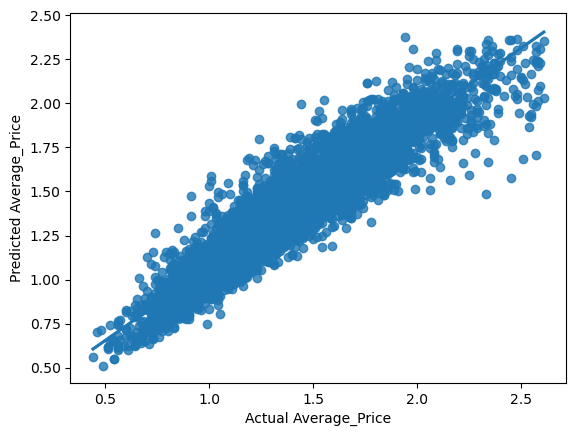

In [1581]:
sns.regplot(x=y_test[:],y=load_model.predict(x_test)[:])
plt.xlabel('Actual Average_Price')
plt.ylabel('Predicted Average_Price')

# 2)Avacado Region Prediction Project

# Classification Project.

Now, the target variable is "Region".

EDA, Data Cleaning, Data Engineering same as before.

Outliers are removed.
Skewness are removed.
multicollinearity has been removed already.

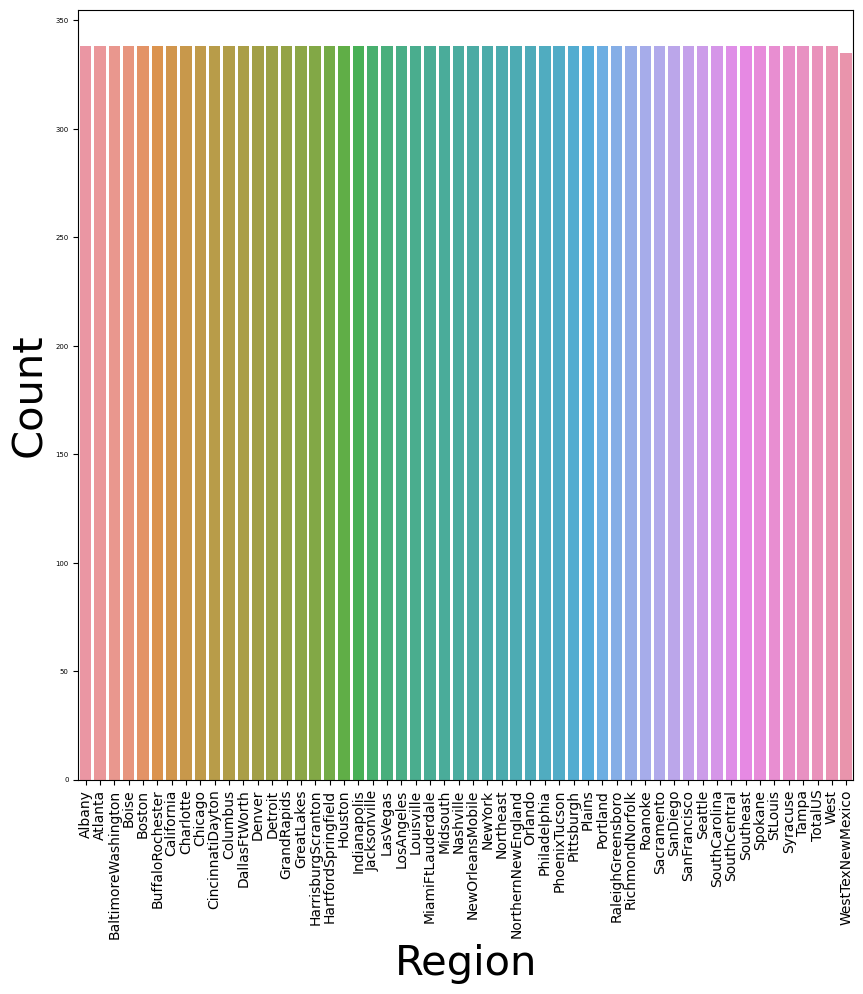

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [154]:
plt.figure(figsize = (10,10))
sns.countplot(x='Region', data =df)
plt.xlabel('Region', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.yticks(size=5)
plt.xticks(rotation=90)
plt.show()
print(df['Region'].value_counts())

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  18249 non-null  float64
 1   PLU_4046_Sold  18249 non-null  float64
 2   PLU_4225_Sold  18249 non-null  float64
 3   PLU_4770_Sold  18249 non-null  float64
 4   Small_Bags     18249 non-null  float64
 5   Large_Bags     18249 non-null  float64
 6   XLarge_Bags    18249 non-null  float64
 7   Type           18249 non-null  float64
 8   Year           18249 non-null  int64  
 9   Region         18249 non-null  float64
 10  Month          18249 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.5 MB


# Checking Correlation

In [167]:
df.corr()

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
Average_Price,1.000000,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.119089
PLU_4046_Sold,-0.208317,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.013348
PLU_4225_Sold,-0.172928,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.008662
PLU_4770_Sold,-0.179446,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.012535
Small_Bags,-0.174730,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.013886
Large_Bags,-0.172940,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.008635
XLarge_Bags,-0.117592,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.018272
Type,0.615845,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000038
Year,0.093197,0.003353,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055,-0.053205
Region,-0.011716,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,-0.000055,1.000000,0.000065


<Axes: >

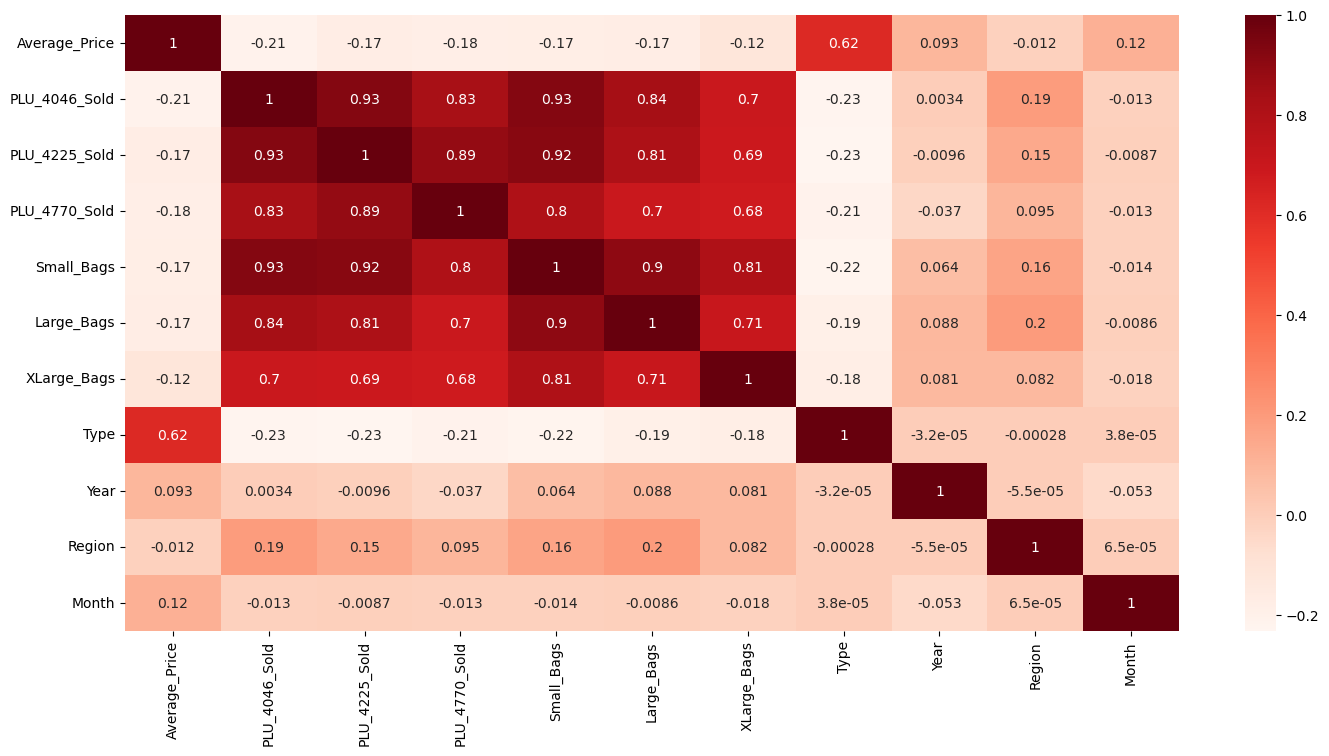

In [168]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [169]:
df.head(5)

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0,2015,0.0,2.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0,2015,0.0,2.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0,2015,0.0,2.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0,2015,0.0,2.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0,2015,0.0,9.0


In [163]:
df.sample(15)

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
8985,1.16,386100.25,426277.63,2512.69,231913.11,1286.43,3218.39,0.0,2018,42.0,7.0
10041,2.36,84.97,3012.17,18.30,434.81,0.00,0.00,1.0,2015,17.0,8.0
13510,1.51,1.25,235.20,0.00,8629.75,0.00,0.00,1.0,2016,30.0,1.0
935,1.06,6387.60,267593.62,165.35,55401.31,2660.26,0.00,0.0,2015,17.0,4.0
7875,1.77,182705.28,349569.02,5175.30,110145.30,1127.91,3653.06,0.0,2017,42.0,8.0
2356,0.86,2897999.07,2322076.97,36318.54,571900.30,151197.44,35.92,0.0,2015,45.0,11.0
643,1.17,157630.43,348863.51,18154.64,46710.57,76789.00,0.00,0.0,2015,12.0,1.0
7421,1.27,34239.68,19312.09,1573.33,31900.28,6411.19,0.00,0.0,2017,34.0,2.0
1217,0.93,2141.86,59505.29,3666.88,11522.64,13604.50,695.48,0.0,2015,23.0,1.0
6644,1.35,7818.03,78546.10,1301.64,39049.20,41000.59,2821.03,0.0,2017,19.0,1.0


In [170]:
df['Region'] = df['Region'].astype(int)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  18249 non-null  float64
 1   PLU_4046_Sold  18249 non-null  float64
 2   PLU_4225_Sold  18249 non-null  float64
 3   PLU_4770_Sold  18249 non-null  float64
 4   Small_Bags     18249 non-null  float64
 5   Large_Bags     18249 non-null  float64
 6   XLarge_Bags    18249 non-null  float64
 7   Type           18249 non-null  float64
 8   Year           18249 non-null  int64  
 9   Region         18249 non-null  int32  
 10  Month          18249 non-null  float64
dtypes: float64(9), int32(1), int64(1)
memory usage: 1.5 MB


In [1588]:
df.sample(10)

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month
14480,0.86,10.922541,9.770856,1.742416,4.378128,19.747680,0.000000,1.0,2016,48,4.0
10065,1.49,16.853739,4.408866,0.000000,14.953933,0.000000,0.000000,1.0,2015,18,2.0
12546,1.20,20.348388,9.229881,0.000000,19.932145,10.920082,0.000000,1.0,2016,11,7.0
7443,1.25,35.658158,31.385715,11.374489,31.104541,18.608845,13.219164,0.0,2017,34,5.0
3963,1.16,104.887475,82.380403,39.525011,97.092131,37.122112,29.381993,0.0,2016,22,10.0
10851,1.52,20.001467,10.447936,0.000000,5.233341,2.819339,0.000000,1.0,2015,33,10.0
18229,1.49,32.459573,36.627711,4.406808,46.414282,49.092256,6.350596,1.0,2018,52,3.0
4841,1.33,31.609826,29.343892,4.458046,34.757587,6.724393,0.000000,0.0,2016,39,9.0
17478,1.57,55.690766,72.828909,16.084617,78.808164,69.897673,0.000000,1.0,2017,51,8.0
1598,1.19,13.299007,63.189198,4.344835,37.864871,4.855179,0.000000,0.0,2015,30,0.0


In [172]:
df['Region'].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: Region, dtype: int64

No need for balancing the dataset.

In [1589]:
df['Region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 53, 51])

# Splitting target variable

In [1590]:
x = df.drop("Region", axis = 1)
y= df['Region']

In [1592]:
x.shape

(17651, 10)

In [1594]:
x.head(5)

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Month
0,1.33,10.120997,37.903460,3.638275,20.490870,4.534711,0.0,0.0,2015,2.0
1,1.35,8.768933,35.473513,3.878204,21.110581,4.602425,0.0,0.0,2015,2.0
2,0.93,9.262632,47.790416,5.072283,20.035113,4.689671,0.0,0.0,2015,2.0
3,1.08,10.421946,41.597133,4.171309,17.839520,5.114173,0.0,0.0,2015,2.0
4,1.28,9.800999,35.260208,4.231732,18.157325,5.825433,0.0,0.0,2015,9.0


# To remove biasness, we use Standard scaler method

In [1595]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Average_Price,PLU_4046_Sold,PLU_4225_Sold,PLU_4770_Sold,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Month
0,-0.195352,-0.709648,0.059642,-0.533970,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,-1.029537
1,-0.143510,-0.755064,-0.025495,-0.516157,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,-1.029537
2,-1.232207,-0.738480,0.406050,-0.427502,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,-1.029537
3,-0.843387,-0.699539,0.189057,-0.494395,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,-1.029537
4,-0.324959,-0.720397,-0.032969,-0.489909,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,1.062882
...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.623118,-0.864717,-0.804096,-0.384638,-0.618863,-0.51836,0.981309,1.980756,-0.730620
17647,0.789660,-0.693490,-0.739905,-0.804096,-0.506311,-0.659154,-0.51836,0.981309,1.980756,-0.431703
17648,1.204402,-0.693468,-0.795864,-0.136211,-0.492667,-0.858596,-0.51836,0.981309,1.980756,-0.431703
17649,1.359930,-0.662756,-0.764122,-0.136496,-0.444110,-0.846859,-0.51836,0.981309,1.980756,-0.431703


# Model Building

In [1597]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9227719033232629 at random state  50


# Train Test Split

In [1601]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [1602]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

Random Forest Classifier

In [1603]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print("Accuracy for RandomForestClassifier model is ", accuracy_score(y_test,predRFC)*100)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

Accuracy for RandomForestClassifier model is  91.95619335347432
[[84  0  0 ...  0  0  0]
 [ 0 84  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 70]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       103
           1       0.89      0.82      0.86       102
           2       0.97      0.99      0.98        93
           3       0.91      0.85      0.88        95
           4       0.98      0.99      0.99       106
           5       0.91      0.90      0.91        90
           6       0.97      1.00      0.98        92
           7       0.88      0.92      0.90       102
           8       0.99      0.99      0.99       105
           9       0.89      0.94      0.91        96
          10       0.88      0.94      0.91       103
          11       0.97      0.96      0.96       115
          12       0.94      0.97      0.96       106
          13       0.92

Logistic Regression

In [1606]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print("Accuracy for LogisticRegression model is ", accuracy_score(y_test,predLR)*100)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

Accuracy for LogisticRegression model is  48.357250755287005
[[33  0  0 ...  0  0  0]
 [ 0 35  0 ...  0  0  0]
 [ 0  0 56 ...  0  0  6]
 ...
 [ 0  0  0 ... 53  5  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  5  0 ...  0  0 25]]
              precision    recall  f1-score   support

           0       0.38      0.32      0.35       103
           1       0.30      0.34      0.32       102
           2       0.52      0.60      0.56        93
           3       0.47      0.38      0.42        95
           4       0.46      0.55      0.50       106
           5       0.35      0.56      0.43        90
           6       0.79      0.85      0.82        92
           7       0.53      0.74      0.61       102
           8       0.73      0.84      0.78       105
           9       0.43      0.61      0.51        96
          10       0.67      0.29      0.41       103
          11       0.41      0.36      0.38       115
          12       0.47      0.48      0.48       106
          13       0.54   

Support Vector Machine Classifier

In [1607]:
svc = SVC()
svc.fit(x_train,y_train)
predSVC = svc.predict(x_test)
print("Accuracy for SVC model is ", accuracy_score(y_test,predSVC)*100)
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

Accuracy for SVC model is  70.14728096676737
[[69  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 68  0]
 [ 0  4  0 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       103
           1       0.38      0.54      0.45       102
           2       0.94      0.84      0.89        93
           3       0.90      0.48      0.63        95
           4       0.84      0.75      0.80       106
           5       0.60      0.56      0.58        90
           6       0.90      0.99      0.94        92
           7       0.72      0.87      0.79       102
           8       0.96      0.98      0.97       105
           9       0.62      0.58      0.60        96
          10       0.62      0.47      0.53       103
          11       0.67      0.59      0.63       115
          12       0.91      0.81      0.86       106
          13       0.83      0.47      0.6

Gaussian Naive Bayes

In [1608]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print("Accuracy for GaussianNB model is ", accuracy_score(y_test,predGNB)*100)
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

Accuracy for GaussianNB model is  19.67522658610272
[[21  0  0 ...  0  0  0]
 [ 2 20  0 ...  0  0  4]
 [11  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  2  0 ...  2 16  0]
 [ 9  1  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.08      0.20      0.11       103
           1       0.12      0.20      0.15       102
           2       0.30      0.33      0.31        93
           3       0.23      0.33      0.27        95
           4       0.47      0.14      0.22       106
           5       0.30      0.20      0.24        90
           6       0.67      0.40      0.50        92
           7       0.14      0.04      0.06       102
           8       0.84      0.41      0.55       105
           9       0.31      0.39      0.35        96
          10       0.27      0.07      0.11       103
          11       0.12      0.03      0.04       115
          12       0.34      0.43      0.38       106
          13       0.30      0.30  

Decision Tree Classifier

In [1609]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print("Accuracy for DecisionTreeClassifier model is ", accuracy_score(y_test,predDTC)*100)
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

Accuracy for DecisionTreeClassifier model is  79.45619335347432
[[65  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  1]
 [ 0  0 82 ...  0  0  1]
 ...
 [ 0  0  0 ... 60  1  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  0 ...  0  0 62]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       103
           1       0.74      0.71      0.72       102
           2       0.86      0.88      0.87        93
           3       0.75      0.72      0.73        95
           4       0.92      0.89      0.90       106
           5       0.64      0.78      0.70        90
           6       0.95      0.93      0.94        92
           7       0.86      0.82      0.84       102
           8       0.94      0.91      0.93       105
           9       0.78      0.79      0.79        96
          10       0.71      0.69      0.70       103
          11       0.90      0.90      0.90       115
          12       0.82      0.80      0.81       106
          13       0.76

KNeighbors Classifier

In [1610]:
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)
predKnn = Knn.predict(x_test)
print("Accuracy for KNeighbors Classifier model is ", accuracy_score(y_test,predKnn)*100)
print(confusion_matrix(y_test,predKnn))
print(classification_report(y_test,predKnn))

Accuracy for KNeighbors Classifier model is  69.05211480362537
[[68  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  1]
 [ 0  0 83 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  2  0 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       103
           1       0.47      0.66      0.54       102
           2       0.73      0.89      0.80        93
           3       0.67      0.69      0.68        95
           4       0.65      0.85      0.73       106
           5       0.53      0.66      0.58        90
           6       0.87      0.88      0.88        92
           7       0.68      0.76      0.72       102
           8       0.94      0.93      0.94       105
           9       0.50      0.54      0.52        96
          10       0.44      0.55      0.49       103
          11       0.71      0.78      0.74       115
          12       0.91      0.83      0.87       106
          13       0.70 

Extra Trees Classifier

In [1611]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
print("Accuracy for ExtraTreesClassifier model is ", accuracy_score(y_test,predETC)*100)
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

Accuracy for ExtraTreesClassifier model is  93.35347432024169
[[90  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  0 ...  0  0 74]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       103
           1       0.91      0.84      0.88       102
           2       0.98      1.00      0.99        93
           3       0.90      0.84      0.87        95
           4       1.00      0.99      1.00       106
           5       0.90      0.90      0.90        90
           6       0.97      1.00      0.98        92
           7       0.94      0.93      0.94       102
           8       1.00      1.00      1.00       105
           9       0.87      0.94      0.90        96
          10       0.92      0.94      0.93       103
          11       0.98      0.97      0.97       115
          12       0.97      0.97      0.97       106
          13       0.91  

Gradient Boosting Classifier

In [1612]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)
print("Accuracy for GradientBoostingClassifier model is ", accuracy_score(y_test,predGBC)*100)
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

Accuracy for GradientBoostingClassifier model is  83.4025679758308
[[82  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  1]
 [ 0  0 88 ...  0  0  1]
 ...
 [ 0  0  0 ... 58  3  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       103
           1       0.73      0.69      0.71       102
           2       0.95      0.95      0.95        93
           3       0.81      0.72      0.76        95
           4       0.90      0.91      0.90       106
           5       0.74      0.74      0.74        90
           6       0.94      0.91      0.93        92
           7       0.82      0.88      0.85       102
           8       0.99      0.96      0.98       105
           9       0.85      0.86      0.86        96
          10       0.72      0.82      0.77       103
          11       0.89      0.90      0.90       115
          12       0.92      0.88      0.90       106
          13       0

AdaBoost Classifier

In [1613]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print("Accuracy for AdaBoostClassifier model is ", accuracy_score(y_test,predABC)*100)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

Accuracy for AdaBoostClassifier model is  8.006042296072508
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  4]
 [ 0  0 38 ...  2  0  0]
 ...
 [ 0  0 25 ... 36  0  0]
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  4  0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.00      0.00      0.00       102
           2       0.09      0.41      0.15        93
           3       0.00      0.00      0.00        95
           4       0.07      0.11      0.09       106
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        92
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00        96
          10       0.00      0.00      0.00       103
          11       0.00      0.00      0.00       115
          12       0.25      0.02      0.04       106
          13       0.00    

Bagging Classifier

In [1614]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print("Accuracy for BaggingClassifier model is ", accuracy_score(y_test,predBC)*100)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

Accuracy for BaggingClassifier model is  87.46223564954683
[[81  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 91 ...  0  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  1 ...  0  0 61]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       103
           1       0.79      0.84      0.82       102
           2       0.93      0.98      0.95        93
           3       0.86      0.81      0.83        95
           4       0.93      0.94      0.94       106
           5       0.80      0.88      0.84        90
           6       0.96      0.98      0.97        92
           7       0.83      0.93      0.88       102
           8       0.95      0.99      0.97       105
           9       0.84      0.91      0.87        96
          10       0.80      0.82      0.81       103
          11       0.94      0.92      0.93       115
          12       0.84      0.90      0.87       106
          13       0.90     

# Cross Validation

In [1617]:
#checking CV score for Random Forest Classifier

cv_score = cross_val_score(RFC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predRFC) - cv_score.mean())

[0.67148117 0.81558074 0.77818697 0.70793201 0.51614731]
0.6978656384608041
Difference between Accuracy score and CV score is  0.22169629507393918


In [1618]:
#checking CV score for LogisticRegression

cv_score = cross_val_score(LR,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predLR) - cv_score.mean())

[0.49306146 0.47025496 0.44504249 0.28271955 0.21558074]
0.3813318378778653
Difference between Accuracy score and CV score is  0.10224066967500478


In [1619]:
#checking CV score for Support Vector Machine Classifier

cv_score = cross_val_score(svc,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predSVC) - cv_score.mean())

[0.65703767 0.72379603 0.61274788 0.44107649 0.33484419]
0.5539004511237176
Difference between Accuracy score and CV score is  0.14757235854395612


In [1620]:
#checking CV score for Gaussian Naive Bayes

cv_score = cross_val_score(GNB,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGNB) - cv_score.mean())

[0.26139904 0.15892351 0.10368272 0.03229462 0.03342776]
0.11794552979959774
Difference between Accuracy score and CV score is  0.07880673606142946


In [1621]:
#checking CV score for Decision Tree Classifier

cv_score = cross_val_score(DTC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predDTC) - cv_score.mean())

[0.49306146 0.66062323 0.6388102  0.52606232 0.41076487]
0.545864415781548
Difference between Accuracy score and CV score is  0.24869751775319526


In [1622]:
#checking CV score for KNeighbors Classifier

cv_score = cross_val_score(Knn,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predKnn) - cv_score.mean())

[0.54035684 0.54504249 0.50113314 0.30509915 0.23116147]
0.4245586200090979
Difference between Accuracy score and CV score is  0.26596252802715586


In [1623]:
#checking CV score for Extra Trees Classifier

cv_score = cross_val_score(ETC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predETC) - cv_score.mean())

[0.71566129 0.78923513 0.78640227 0.71728045 0.51671388]
0.7050586027600139
Difference between Accuracy score and CV score is  0.22847614044240305


In [ ]:
df34

In [1624]:
#checking CV score for Gradient Boosting Classifier

cv_score = cross_val_score(GBC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGBC) - cv_score.mean())

[0.46842254 0.74815864 0.71529745 0.63456091 0.40141643]
0.5935711941901876
Difference between Accuracy score and CV score is  0.24045448556812055


In [1625]:
#checking CV score for AdaBoost Classifier

cv_score = cross_val_score(ABC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predABC) - cv_score.mean())

[0.03936562 0.03002833 0.05127479 0.08016997 0.05495751]
0.051159242741144195
Difference between Accuracy score and CV score is  0.02890118021958088


In [1626]:
#checking CV score for Bagging Classifier

cv_score = cross_val_score(BC,x,y)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predBC) - cv_score.mean())

[0.56556216 0.74759207 0.72351275 0.62577904 0.46175637]
0.62484047806438
Difference between Accuracy score and CV score is  0.24978187843108823


Extra Trees Classifier is our best model because Accuracy score  and CV Score is high and difference between Accuracy score and CV score is least

# Extra Trees Classifier is our best model

# Hyper Parameter Tuning

In [1633]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [50, 100, 200],
              'max_depth' : [0, 10, 20]}


In [1634]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5 )

In [ ]:
df24

In [1635]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [1636]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}


Finding best random state for our best model.

In [1638]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train,y_train)
    pred = ETC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9350453172205438 at random state  72


# Building Final model using best parameters

In [1639]:
Final_model= ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 200)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=72)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  93.22129909365559
[[91  0  0 ...  0  0  0]
 [ 0 91  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 51  0  0]
 [ 0  0  0 ...  1 79  0]
 [ 0  0  0 ...  0  0 94]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        97
           1       0.84      0.88      0.86       104
           2       0.96      1.00      0.98        92
           3       0.92      0.88      0.90       111
           4       1.00      0.97      0.99       105
           5       0.96      0.82      0.88       105
           6       0.99      1.00      0.99        74
           7       0.97      0.94      0.96       115
           8       1.00      0.98      0.99        99
           9       0.86      0.96      0.90        99
          10       0.89      0.89      0.89       106
          11       0.92      0.97      0.95       100
          12       0.94      0.99      0.97       112
          13       0.93      0.84      0.88       100
  

# The accuracy for our best model is 93.2%

# Saving the best model

In [1646]:
import joblib
joblib.dump(Final_model, "Avacado_Region_Prediction_Project.pkl")

['Avacado_Region_Prediction_Project.pkl']

# Loading and Prediction

In [1647]:
import joblib
model= joblib.load("Avacado_Region_Prediction_Project.pkl")

In [1648]:
prediction=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","original value"])

In [1649]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
Predicted value,5,31,39,2,10,31,14,35,35,43,...,27,11,38,37,2,30,25,34,3,53
original value,5,31,39,2,10,31,3,35,35,43,...,27,18,38,7,2,30,25,34,3,53
